<a href="https://colab.research.google.com/github/abfaz/online_retail/blob/main/online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Online Retail Customer Segmentation**

# **Project Description**

**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

**Customer segmentation is an important process for any retail business as it helps in understanding customer behavior, preferences, and needs. Online retail customer segmentation can be achieved by analyzing customer data such as purchase history, website behavior, demographics, and social media engagement.**

# **Dataset Description**

## <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **GitHub Link**

https://github.com/abfaz/online_retail/blob/main/online_retail_customer_segmentation.ipynb

# **Project Summary**


**This project aimed to develop a customer segmentation model for an online retail business. By analyzing customer attributes and behavior, the goal was to identify distinct customer segments for targeted marketing and personalized experiences. The project involved data collection, preprocessing, exploratory data analysis, customer segmentation using clustering techniques, validation and evaluation, and interpretation of insights. The outcome provided valuable insights for the business to create targeted marketing campaigns, personalized recommendations, and optimize product offerings, ultimately improving customer satisfaction, loyalty, and business performance.**

# **Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

#**Reading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/dat/unsupervised/Online Retail.xlsx')

# **Data Inspection and Cleaning**

In [4]:
#checking top 5 rows of dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
#checking bottom 5 rows of dataset
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [6]:
#checking shape of dataset
df.shape

(541909, 8)

In [7]:
# Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#checking for null values in dataset
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
df[['Description','CustomerID']].isnull().mean() * 100

Description     0.268311
CustomerID     24.926694
dtype: float64

In [10]:
#dropping null values
df.dropna(inplace=True)

In [11]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [13]:
# Filtering out values containing letter 'C' for InvoiceNo column
filtered_values = df[df['InvoiceNo'].str.contains('C')]
print(filtered_values)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [14]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [15]:
df.shape


(397924, 8)

In [16]:
#checking summary
df.describe()

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:

#Checking numbers of unique values in each colums
for i in df.columns:
  print(i,':' ,df[i].nunique())

InvoiceNo : 18536
StockCode : 3665
Description : 3877
Quantity : 302
InvoiceDate : 17286
UnitPrice : 441
CustomerID : 4339
Country : 37


#**Exploratory data analysis**

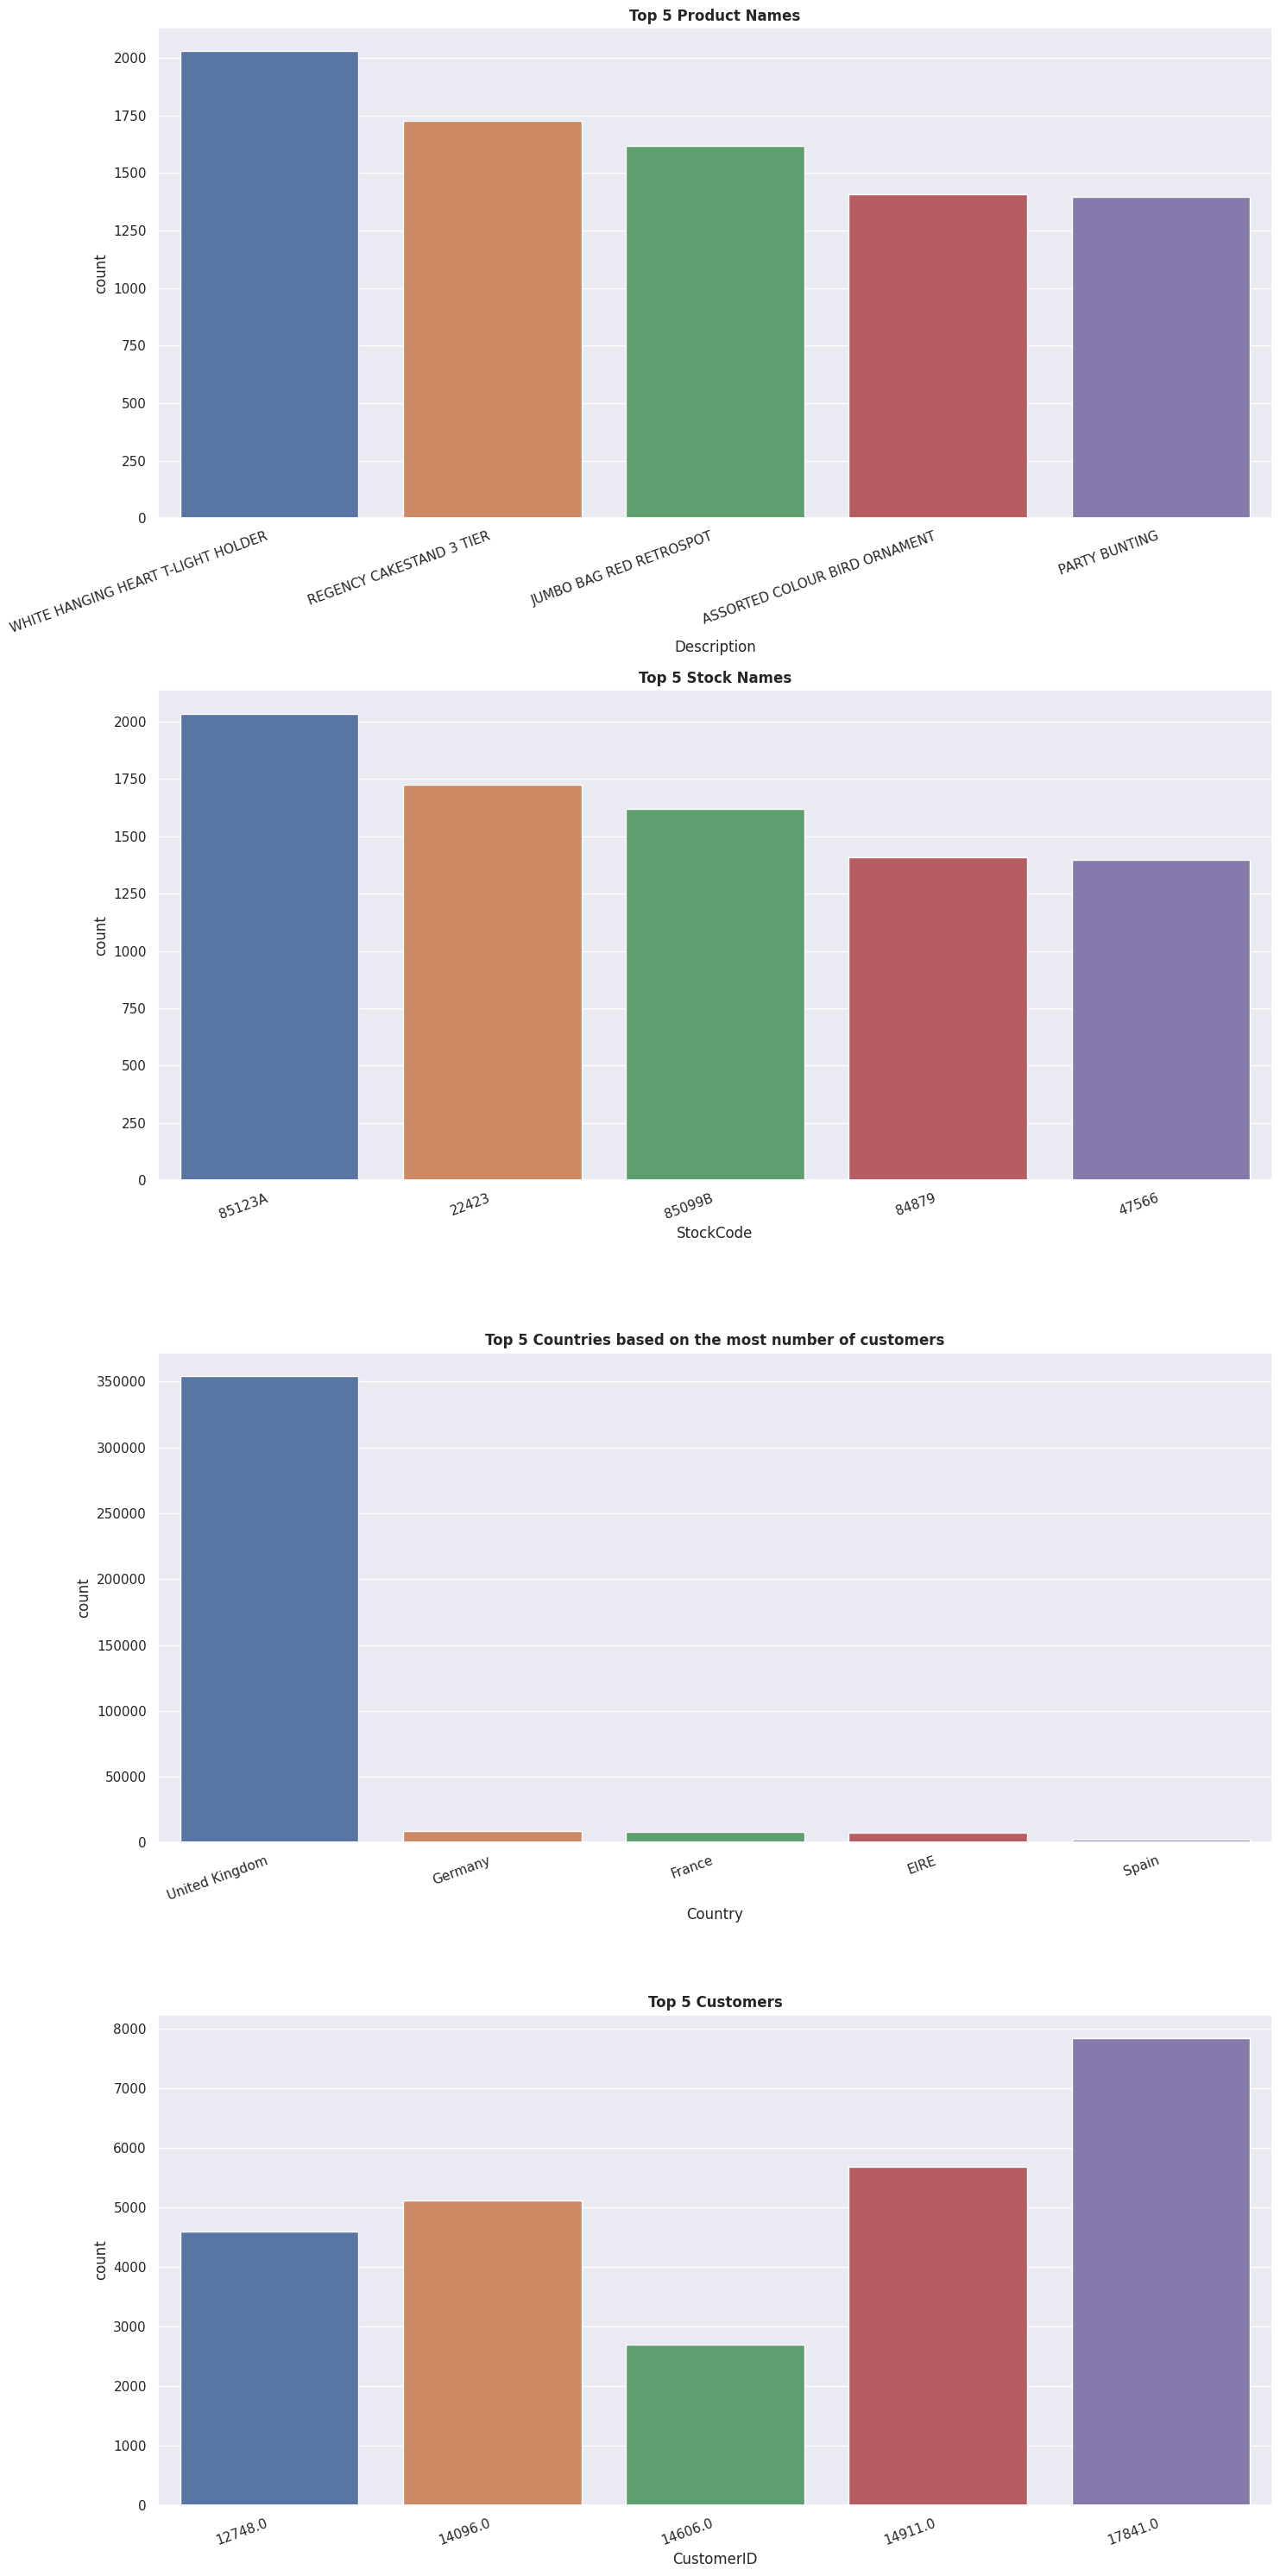

In [19]:
# Plotting top values based on frequency in each column
target = ['Description', 'StockCode', 'Country', 'CustomerID']
title=['Top 5 Product Names','Top 5 Stock Names','Top 5 Countries based on the most number of customers','Top 5 Customers']

plt.figure(figsize=(15,30), dpi=100)
for n,col in enumerate(target):
  plt.subplot(4, 1, n+1)
  plt.title(title[n],fontweight='bold')
  temp = df[col].value_counts().reset_index().head(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp)
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

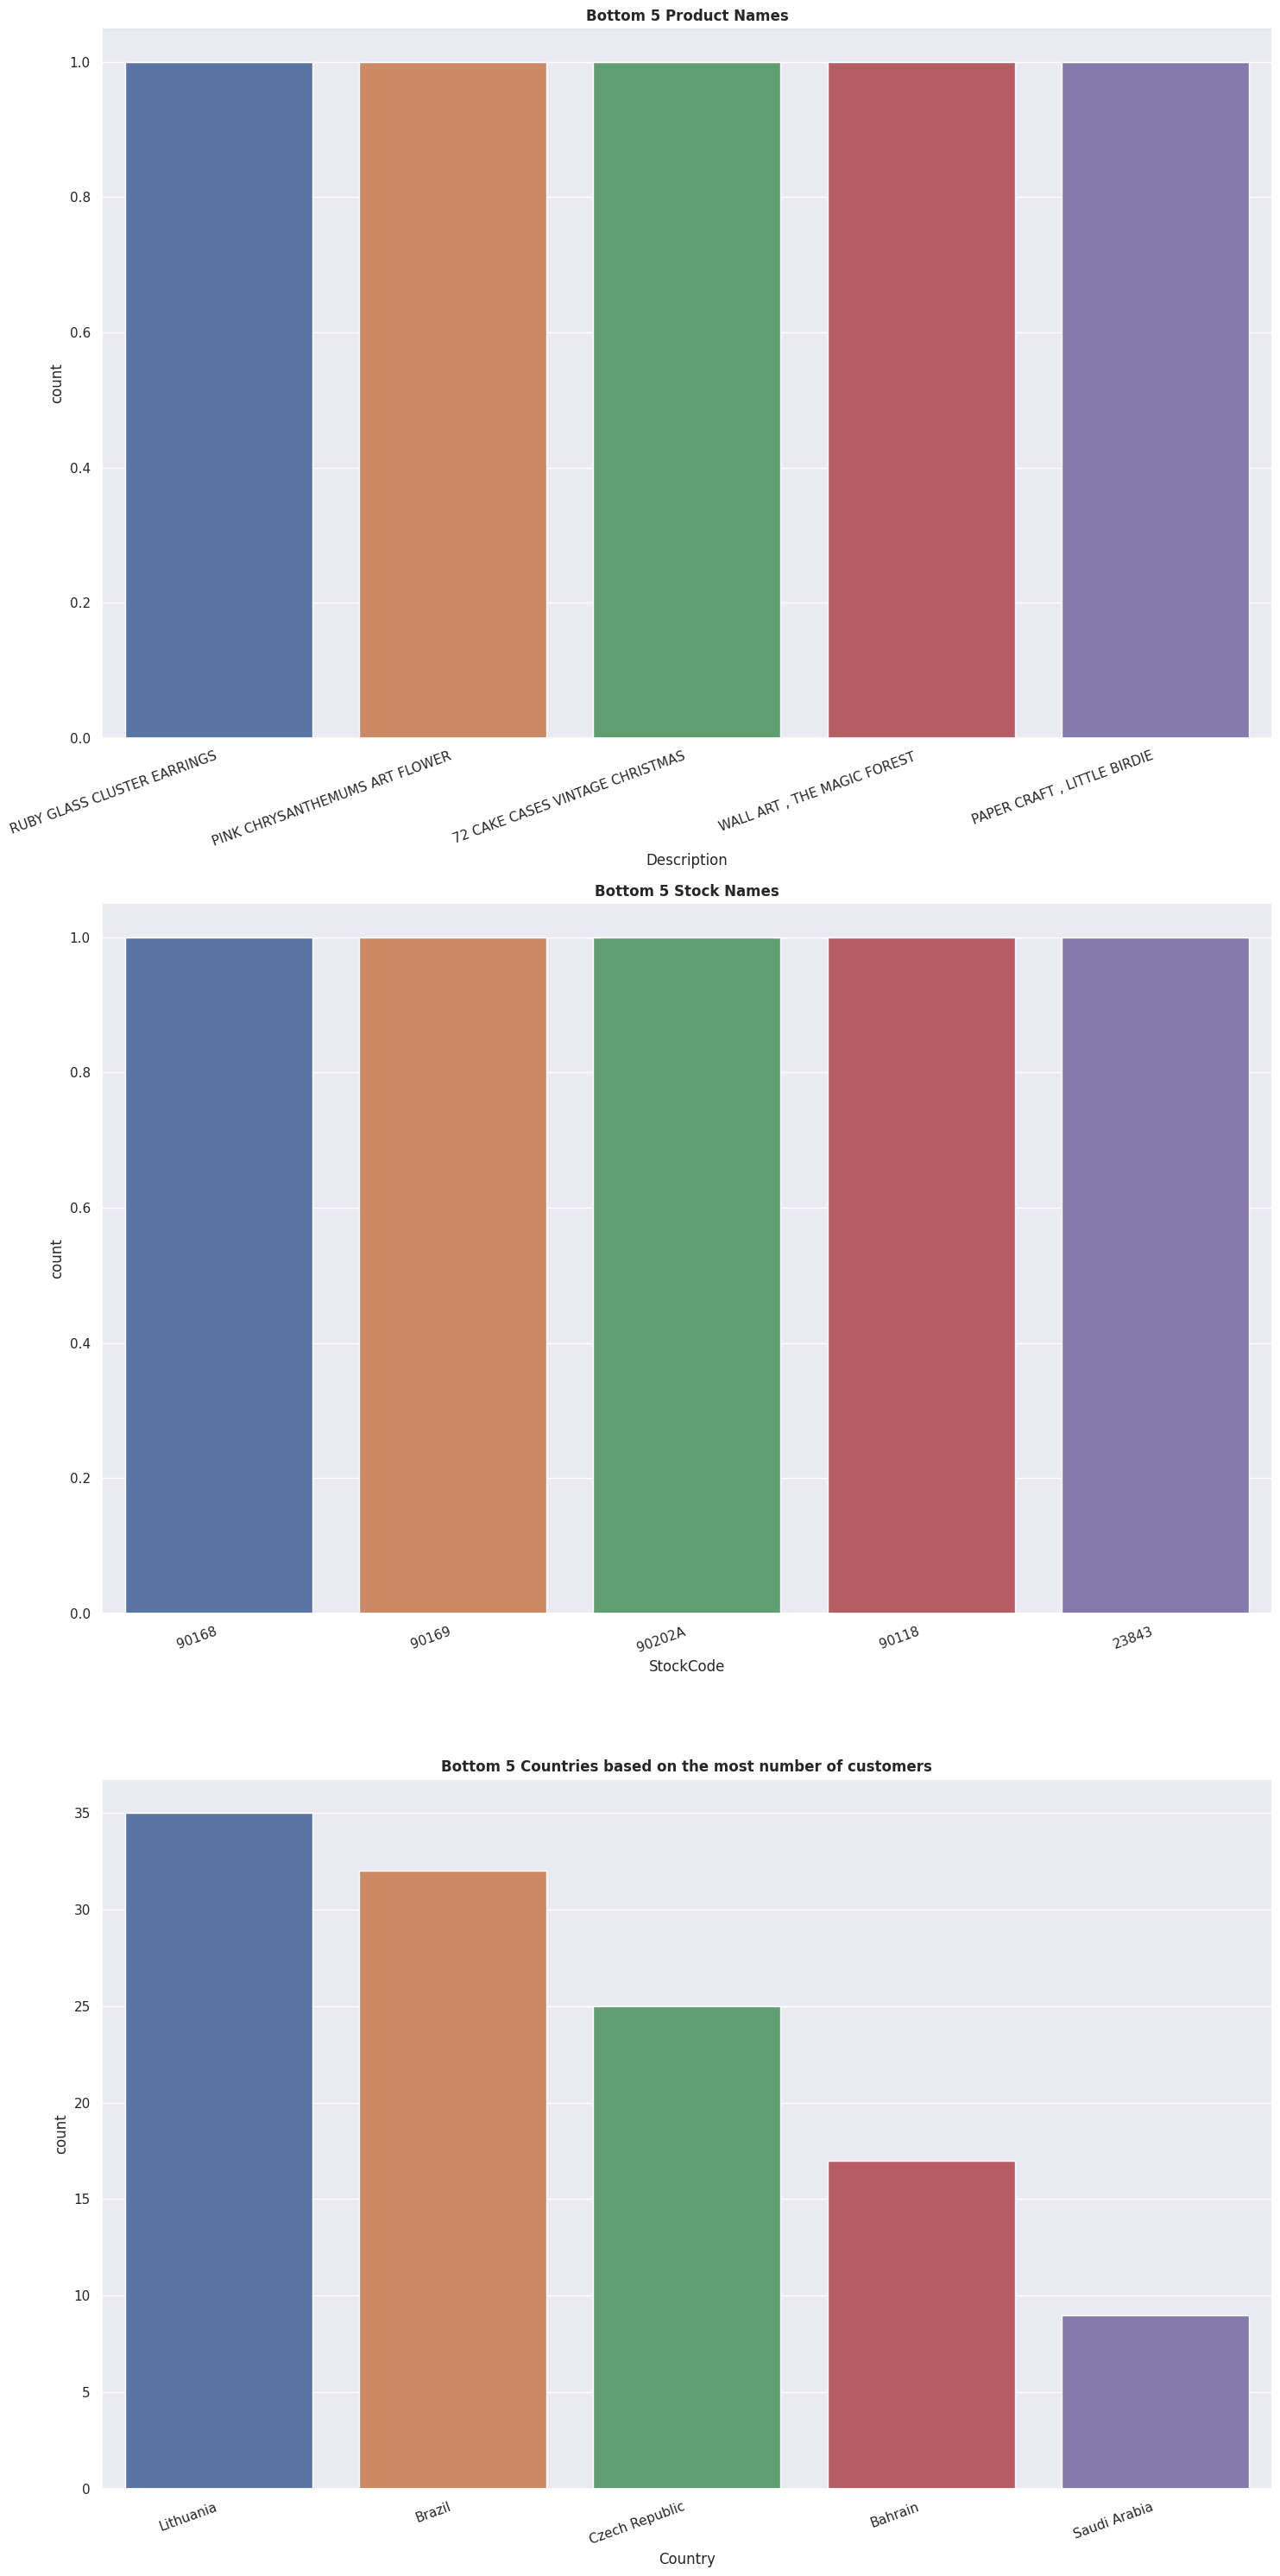

In [20]:
# Plotting bottom values based on frequency in each column
target = ['Description', 'StockCode', 'Country']
title=['Bottom 5 Product Names','Bottom 5 Stock Names', 'Bottom 5 Countries based on the most number of customers']

plt.figure(figsize=(15,30), dpi=100)
for n,col in enumerate(target):
  plt.subplot(3, 1, n+1)
  plt.title(title[n],fontweight='bold')
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp)
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

From the above bar plots, we can conclude that:

*   Top 5 products based on maximum selling are **WHITE HANGING HEART T-LIGHT HOLDER; REGENCY CAKESTAND 3 TIER; JUMBO BAG RED RETROSPOT; PARTY BUNTING;** and **LUNCH BAG RED RETROSPOT.**
*   Top 5 Stock names based on selling are **85123A, 22423, 85099B, 84879,** and **4756.**
*   Most Customers are from **United Kingdom**. Considerable number of customers are also from **Germany, France, EIRE and Spain.** Whereas **Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania** has least number of customers.
*  CustomerID **17841** consistently ranks as the top customer in terms of order frequency.











In [21]:
# Countrywise average item purchases
country_quantity = df.groupby("Country")["Quantity"].mean().reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
23     Netherlands         85.034702
19           Japan         81.046729
31          Sweden         80.006652
0        Australia         71.062447
8   Czech Republic         26.840000

Orders with mass quantity are placed by the customers from Netherlands




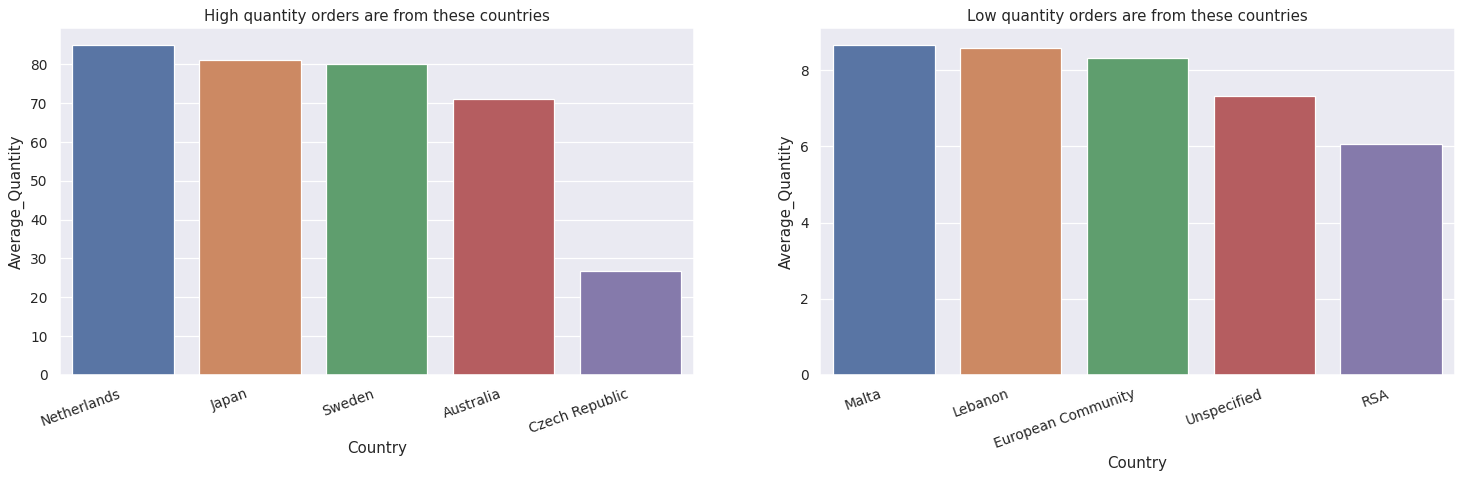

In [22]:
# Visualizing top and bottom 5 countries based on average item purchases
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(5),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(5),x="Country",y="Average_Quantity")
plt.show()

In [23]:
# quantity wise item purchases
product_quantity = df.groupby("Description")["Quantity"].sum().reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1762             JUMBO BAG RED RETROSPOT     46181
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725

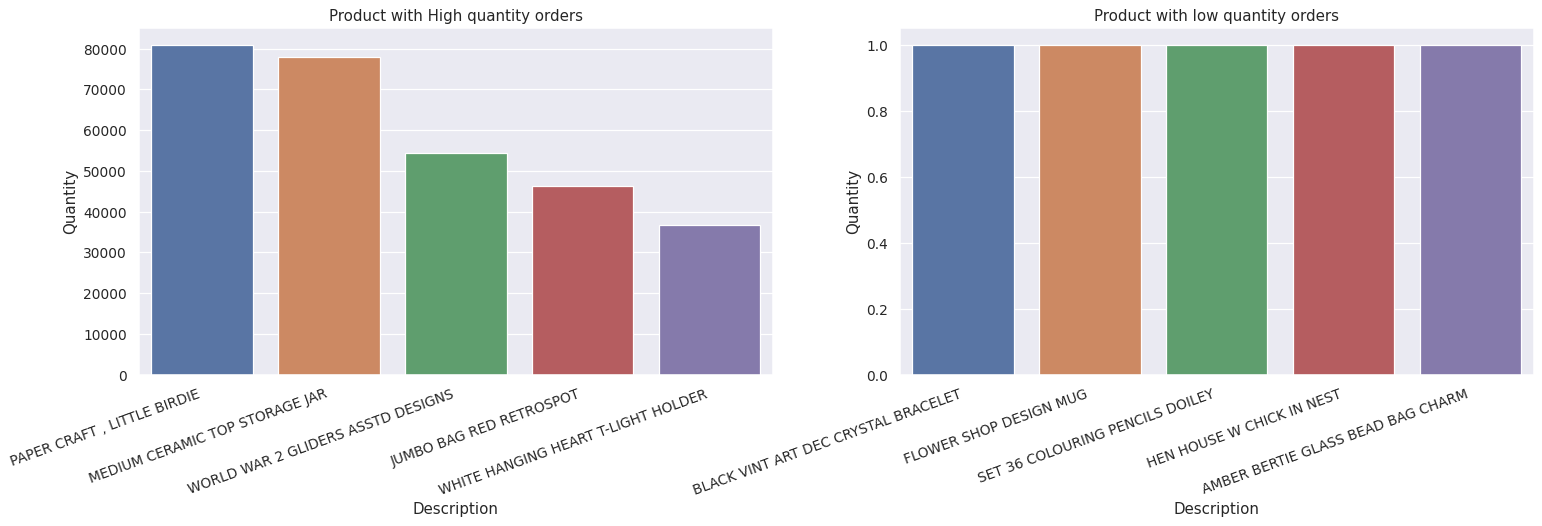

In [24]:
# Visualizing top and bottom 5 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(5),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(5),x="Description",y="Quantity")
plt.show()

In [25]:
# Checking the number of cancellations countrywise.
country_cancellations = filtered_values.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7533
11         Germany            453
7             EIRE            247
10          France            149
26             USA            112

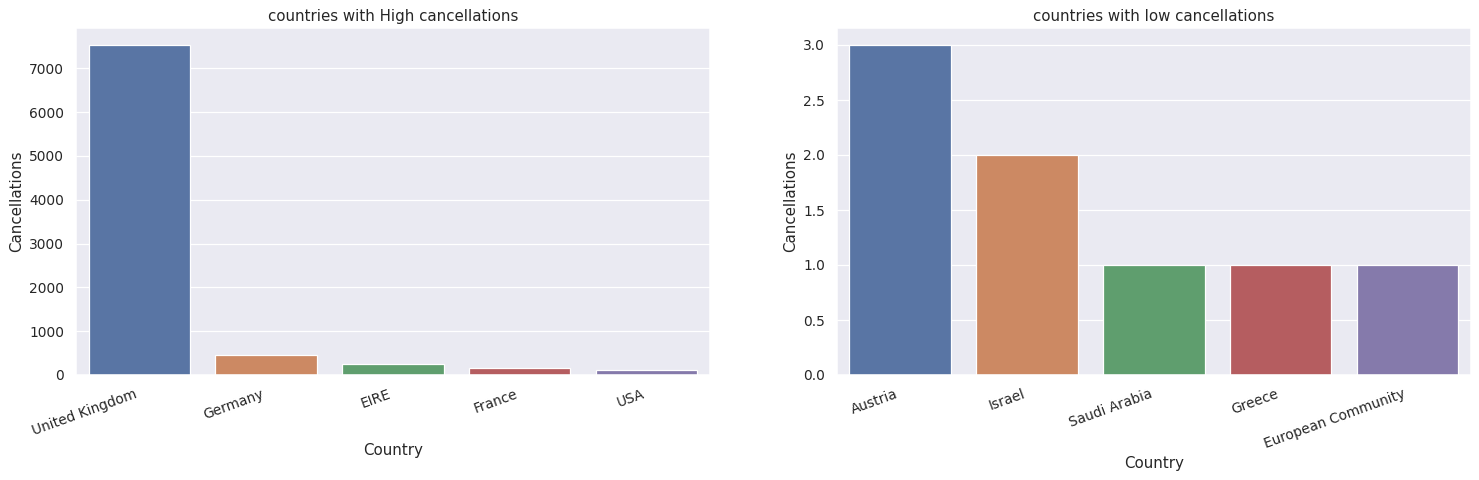

In [26]:
# Visualizing top and bottom 5 countries based on cancellations
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(5),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(5),x="Country",y="Cancellations")
plt.show()

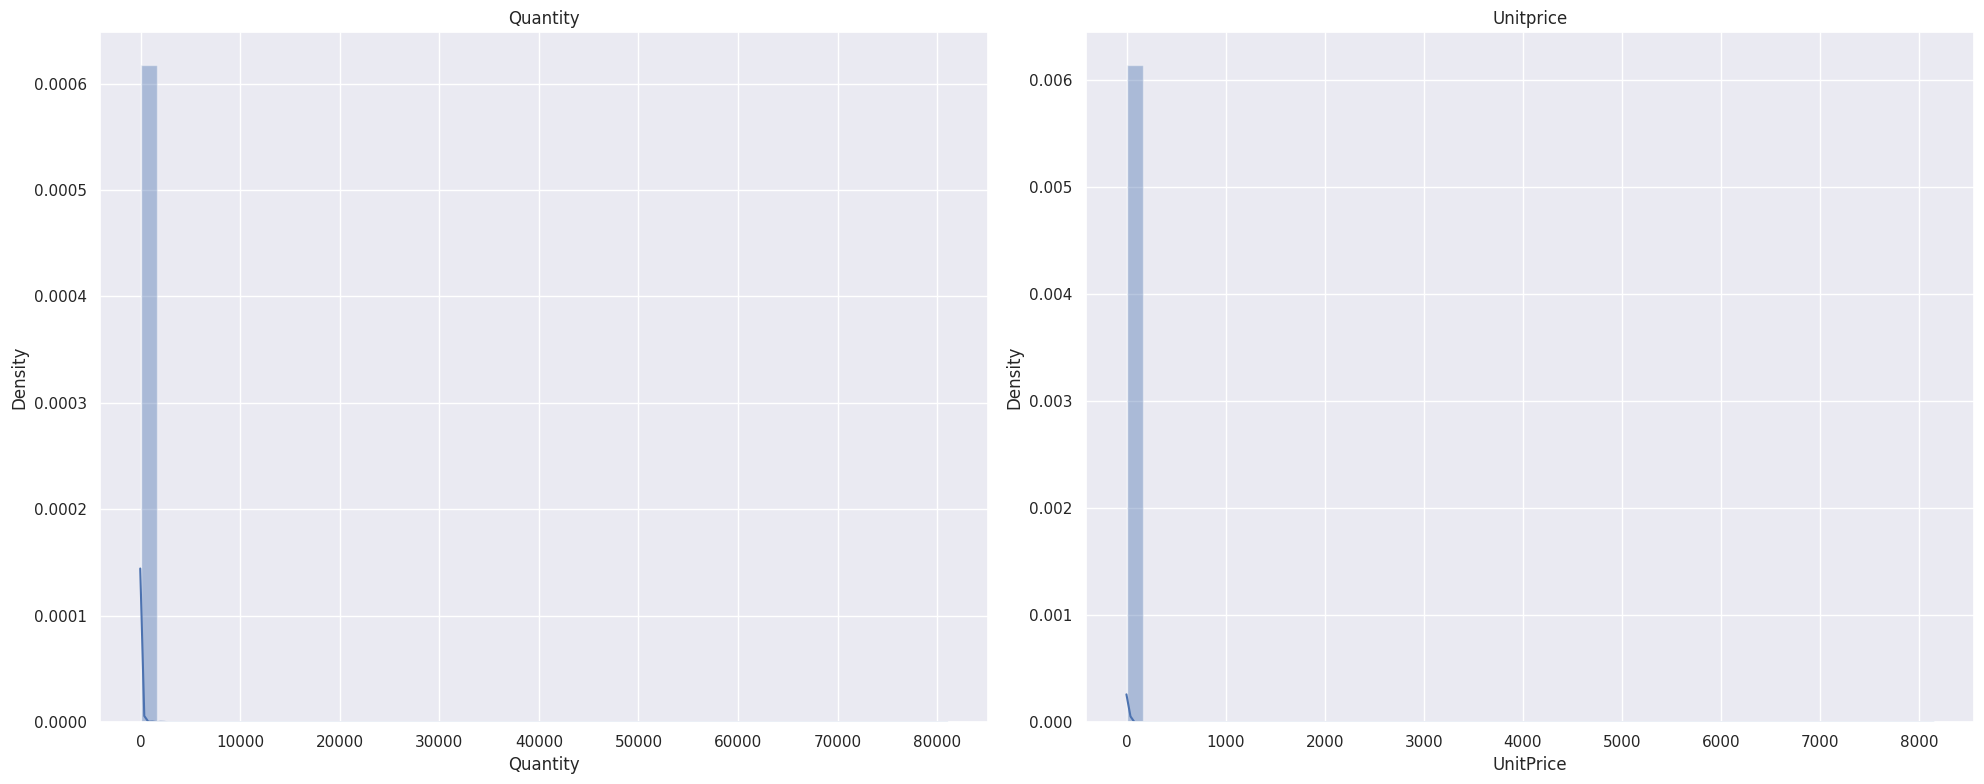

In [27]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice']
plt.figure(figsize=(20,8), dpi=100)
for n,col in enumerate(target):
  plt.subplot(1, 2, n+1)
  sns.distplot(df[col], color='b')
  plt.title(col.title())
  plt.tight_layout()

It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode. For symmetric graph mean=median=mode.

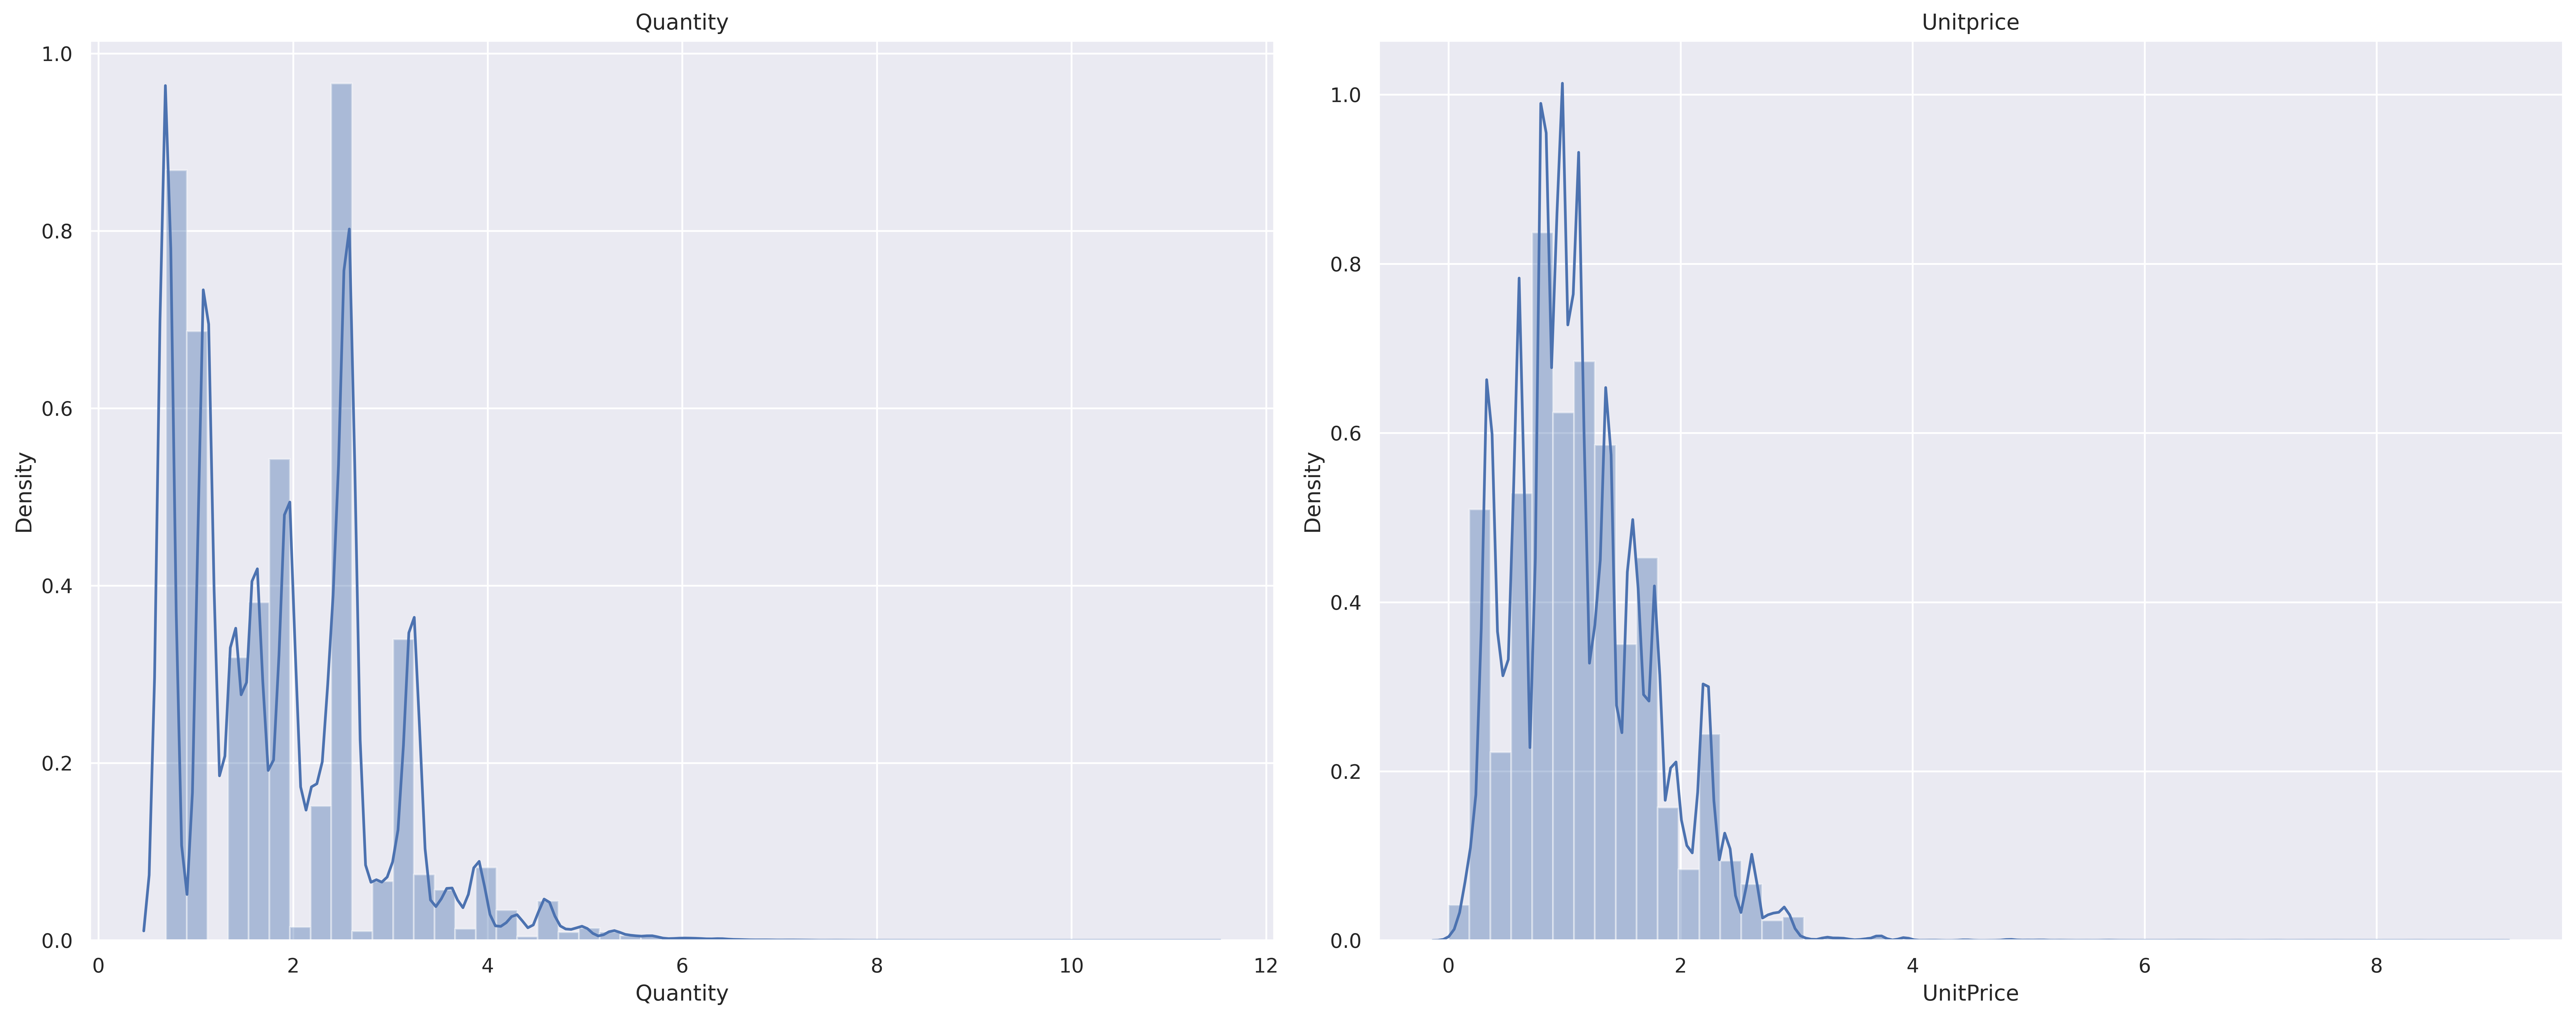

In [28]:
# Visualizing the distributions after log transformation of Quantity and UnitPrice

target = ['Quantity','UnitPrice']
plt.figure(figsize=(20,8), dpi=500)
for n,col in enumerate(target):
  plt.subplot(1, 2, n+1)
  sns.distplot(np.log1p(df[col]), color='b')
  plt.title(col.title())
  plt.tight_layout()

#**Feature engineering**

In [29]:
#Creating new features from Invoicedate
df["year"]  = df["InvoiceDate"].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day']   = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"]  = df["InvoiceDate"].apply(lambda x: x.hour)

In [30]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount']= df['UnitPrice'] * df['Quantity']

In [31]:
# Dividing hours into morning, afternoon and evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'


In [32]:
#applying function we created on hour column
df['Time_type']=df['hour'].apply(time_type)

In [33]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  hour  TotalAmount Time_type  
0  Wednesday     8        15.30   Morning  
1  Wednesday     8        20.34   Morning  
2  Wednesday     8        22.00   Morning  
3  Wednesday     8        20.34   Morning  
4  Wednesday     8        20.34   Morning

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

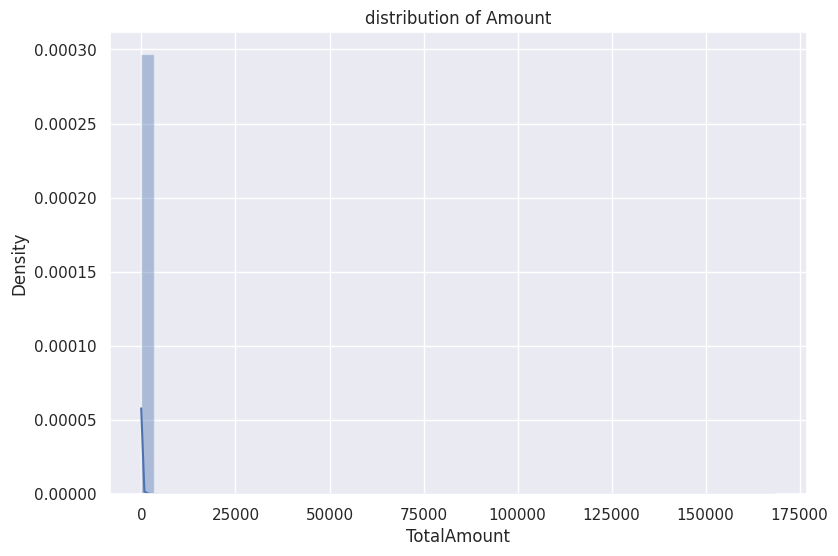

In [34]:
#checking distribution for Totalamount
plt.figure(figsize=(9,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="b")

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

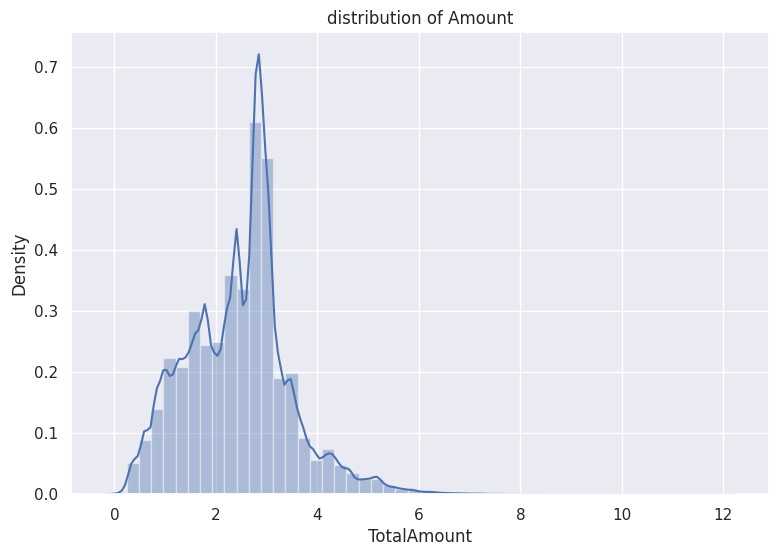

In [35]:
# Visualizing the distributions after log transformation of TotalAmount
plt.figure(figsize=(9,6))
plt.title('distribution of Amount')
sns.distplot(np.log1p(df['TotalAmount']),color="b")


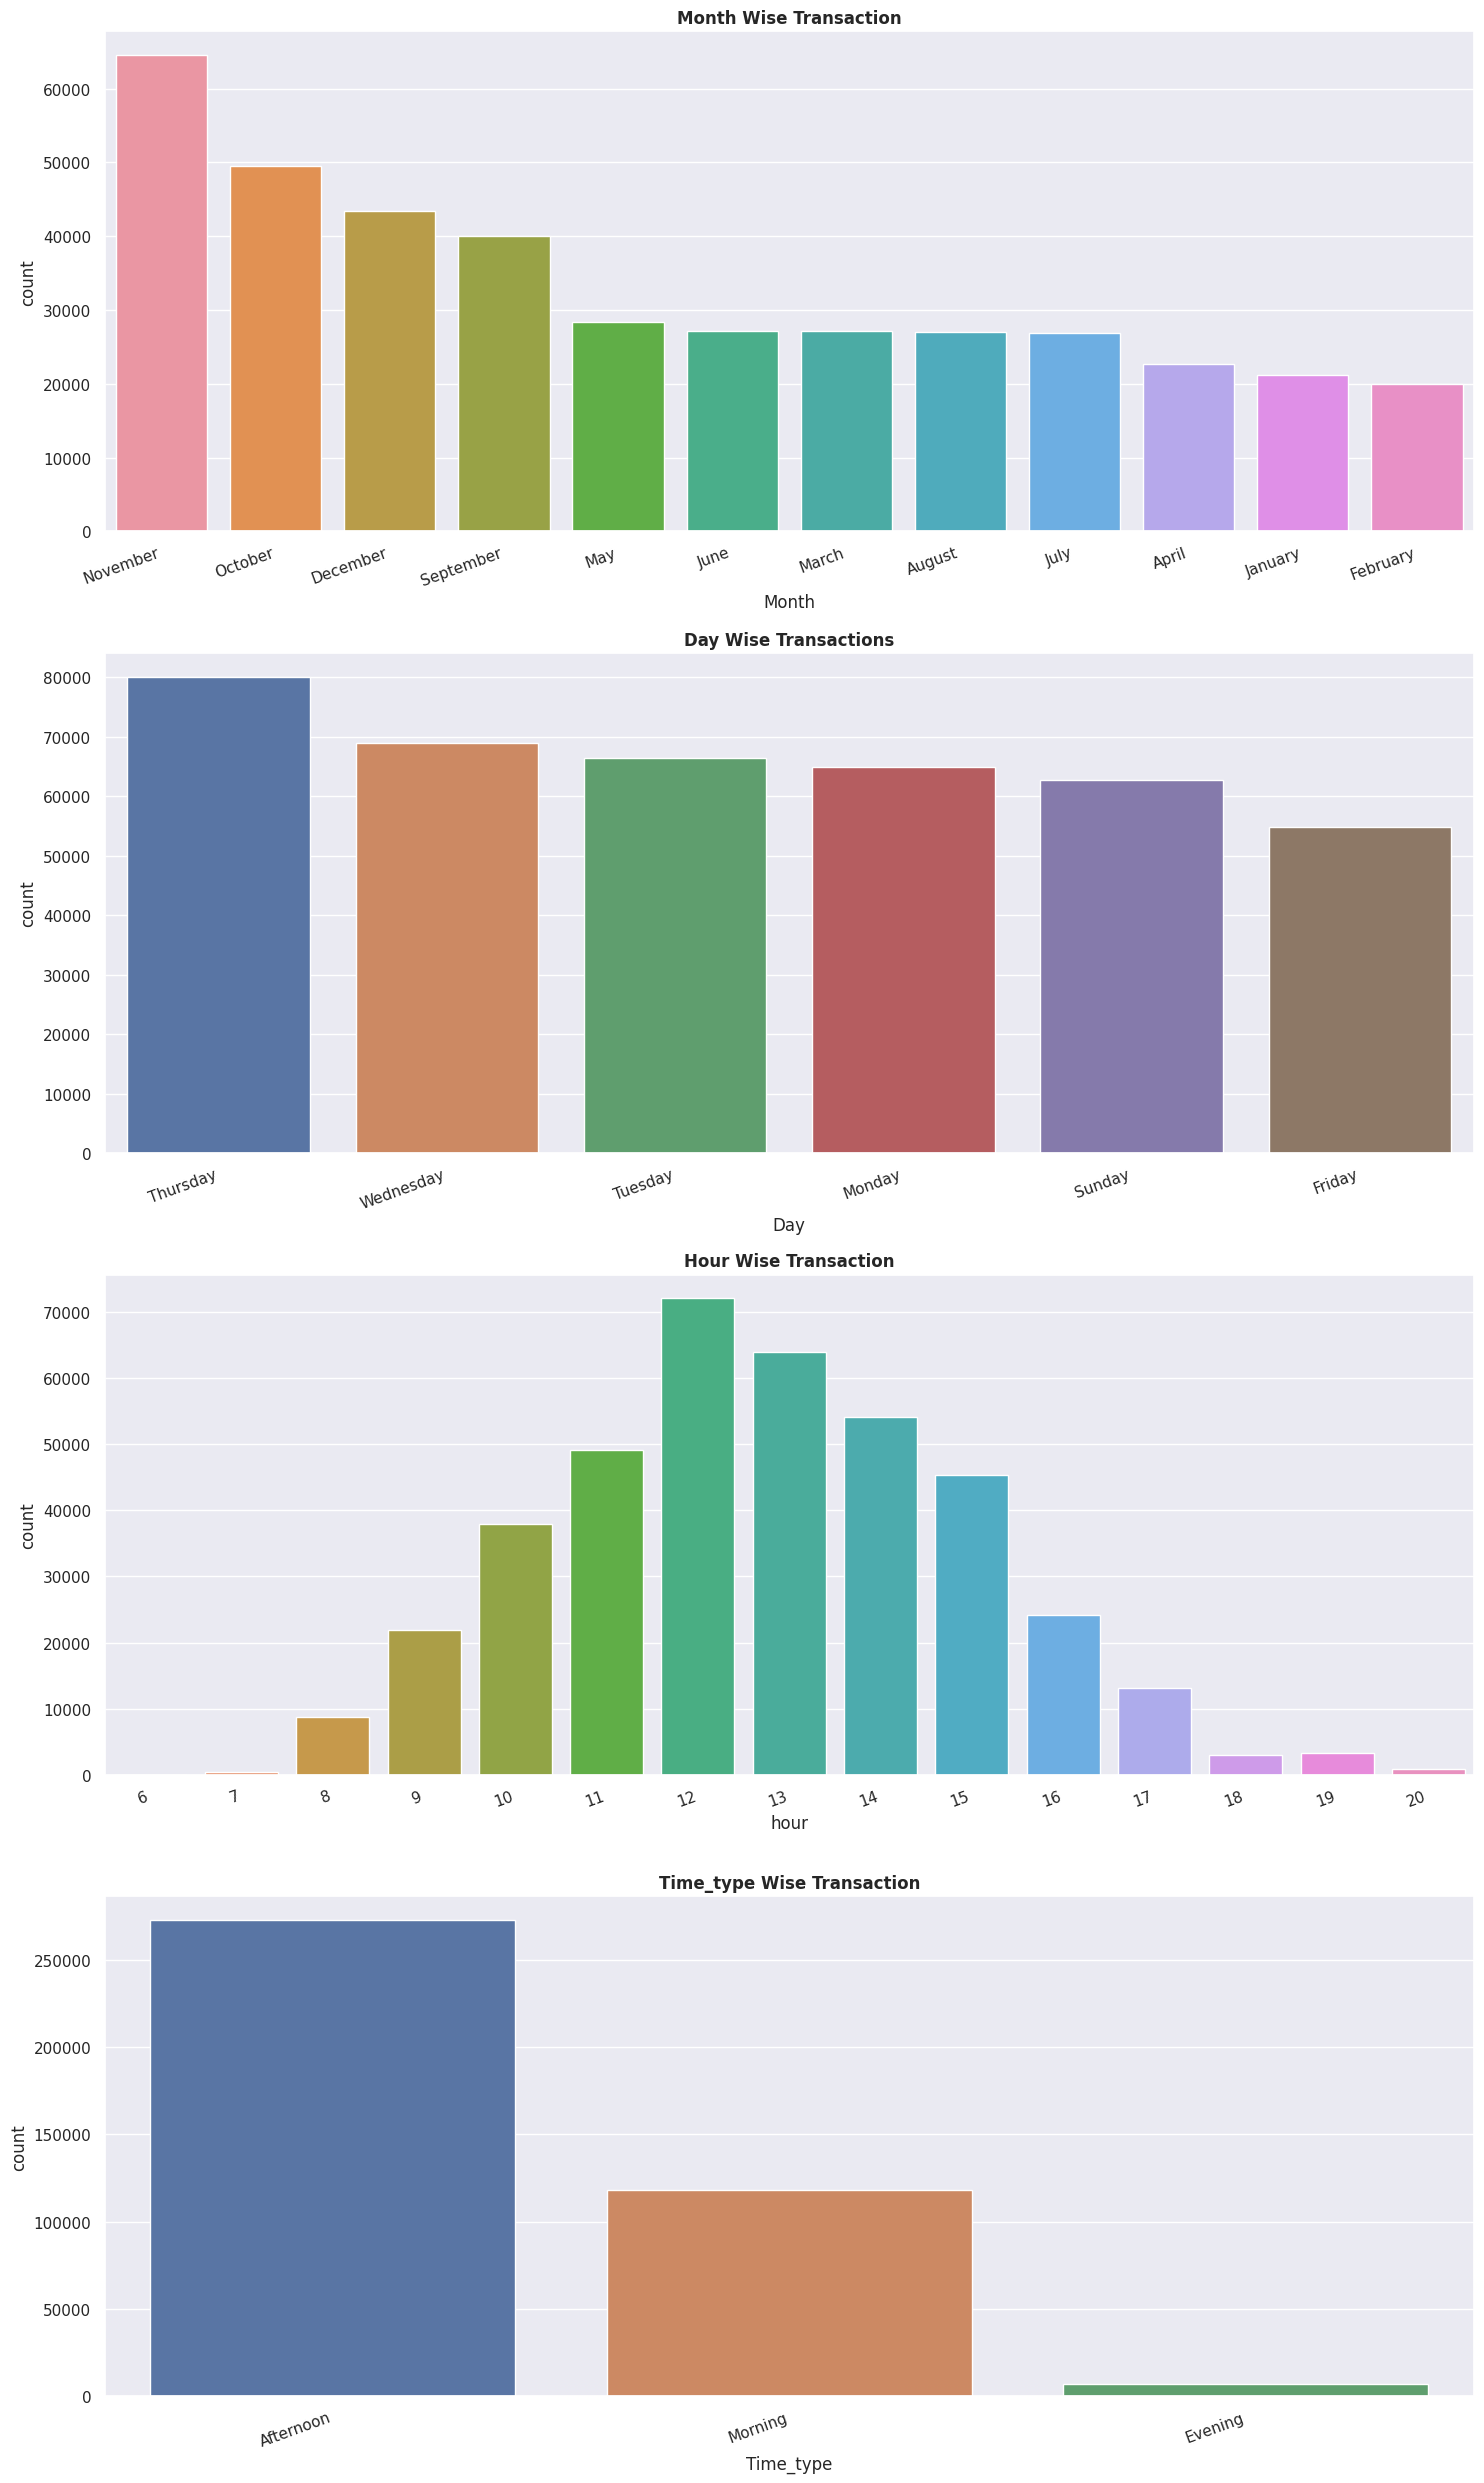

In [36]:
# Plotting top values based on frequency in  new crerated columns
target = ['Month', 'Day', 'hour', 'Time_type']
title=['Month Wise Transaction','Day Wise Transactions','Hour Wise Transaction','Time_type Wise Transaction']

plt.figure(figsize=(15,25), dpi=100)
for n,col in enumerate(target):
  plt.subplot(4, 1, n+1)
  plt.title(title[n],fontweight='bold')
  temp = df[col].value_counts().reset_index()
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp)
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

From the above bar plots, we can conclude that:



*   Most of the customers have purchased the gifts in the month of **November, October, December and September.** Less number of customers have purchased the gifts in the month of **April, January and February.**
*   There are no orders placed on **Saturdays.** Looks like it's a non working day for the retailer.
*   Most of the customers have purchased the items in **Afternoon,** moderate numbers of customers have purchased the items in **Morning** and the least in **Evening.**







# **RFM Modelling**



* **RFM (Recency, Frequency, Monetary) modeling is a statistical technique used in marketing and customer relationship management to analyze customer behavior and determine the value of each customer to a business. It involves analyzing the transactional data of customers and grouping them based on their buying behavior.**
* **RFM stands for the three dimensions:**
   * **Recency - Recency refers to how recently a customer has made a purchase from the business.**
   * **Frequency - Frequency refers to how often a customer makes purchases.**
   * **Monetary - Monetary refers to how much a customer spends on purchases.**
* **These three factors are used to assign scores to each customer, which are then used to segment them into different groups.**




In [37]:
#Recency = Latest Date - Last Inovice Date, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

In [38]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

In [39]:
# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

In [40]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [41]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    91.708689    2053.793248     2.514174     2.490897   
std     100.009747   228.792852    8988.248329     1.126392     1.122139   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     307.245000     2.000000     1.000000   
50%      51.000000    41.000000     674.450000     3.000000     2.000000   
75%     142.000000   100.000000    1661.640000     4.000000     3.000000   
max     374.000000  7847.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.826227     7.504955     3.767274       3.679094   
std       1.118266   118.820043     2.816529     1.432382       1.326943   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.605170   
max       4.000000   444.000000    12.000000     5.924256       8.967887   

       Monetary_Log  
count   4339.000000  
mean       6.589264  
std        1.264714  
min        0.000000  
25%        5.727645  
50%        6.513898  
75%        7.415560  
max       12.543280

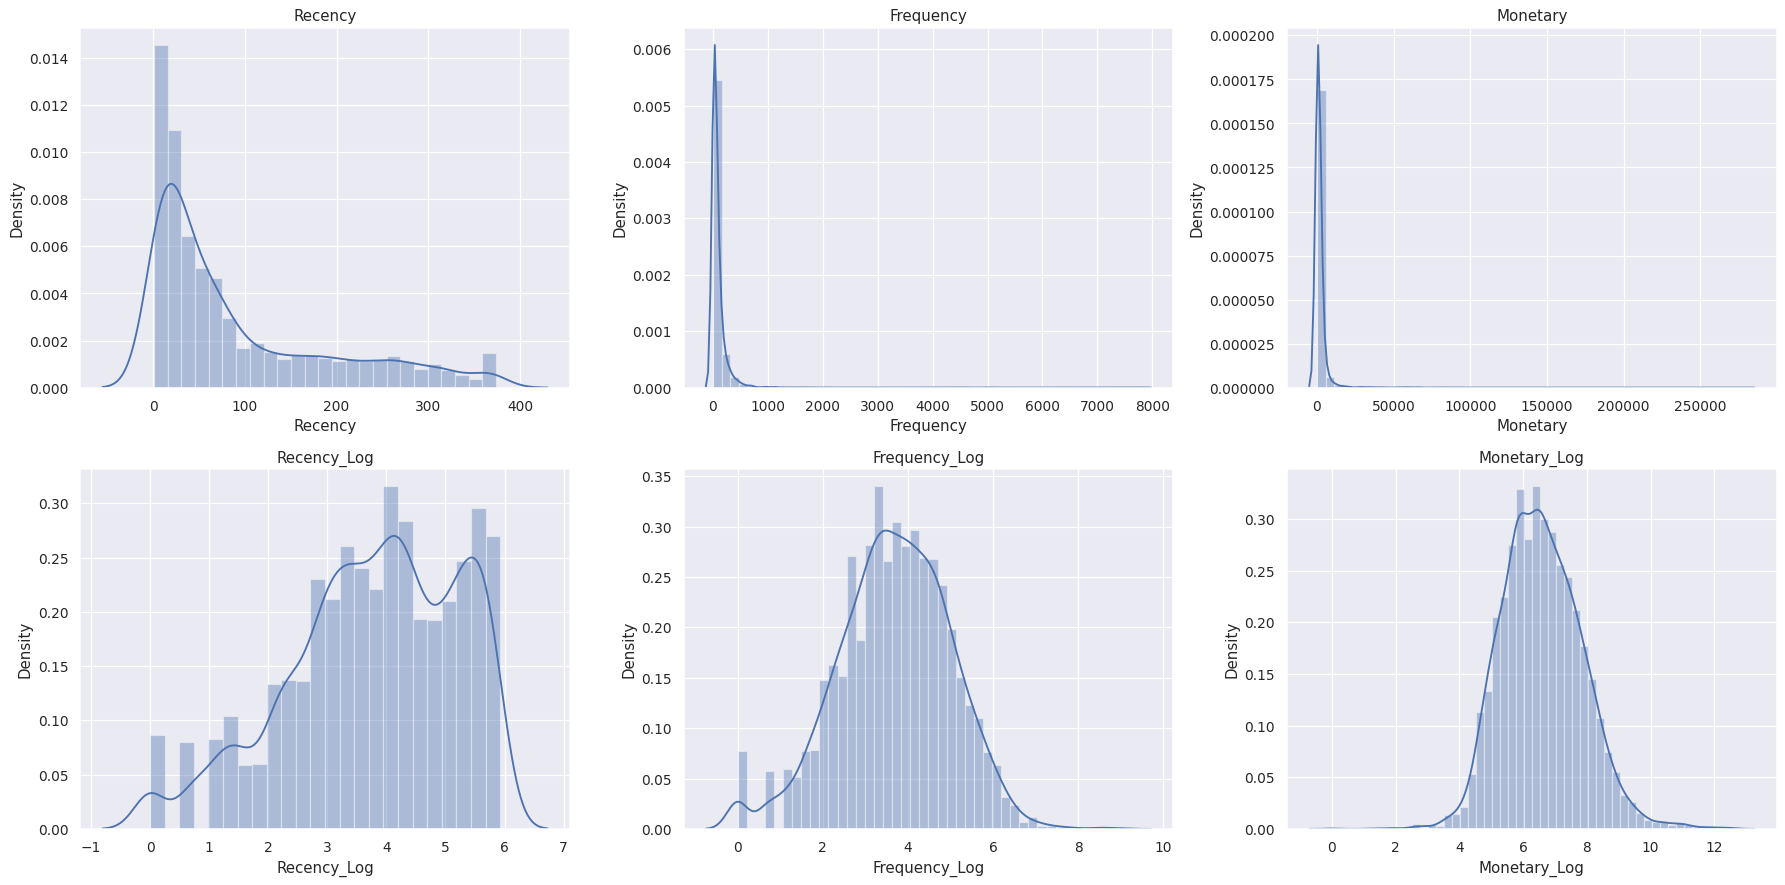

In [42]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

# **Clustering Algorithims**

## **Prerequisites**






In [43]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [44]:
 # Initializing an empty dictionary to store the stats and summary for all clusters
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  # Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, er,title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name)

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap=er))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap=er))

  return stats, summary

## **Binning RFM_Score**

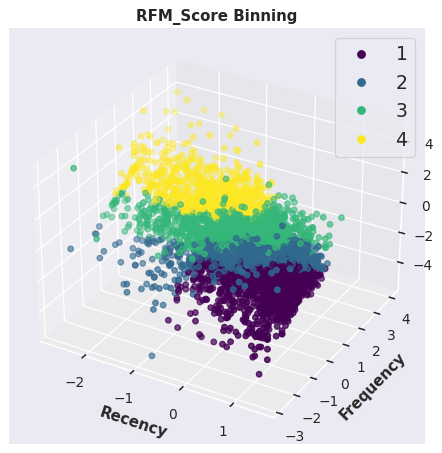

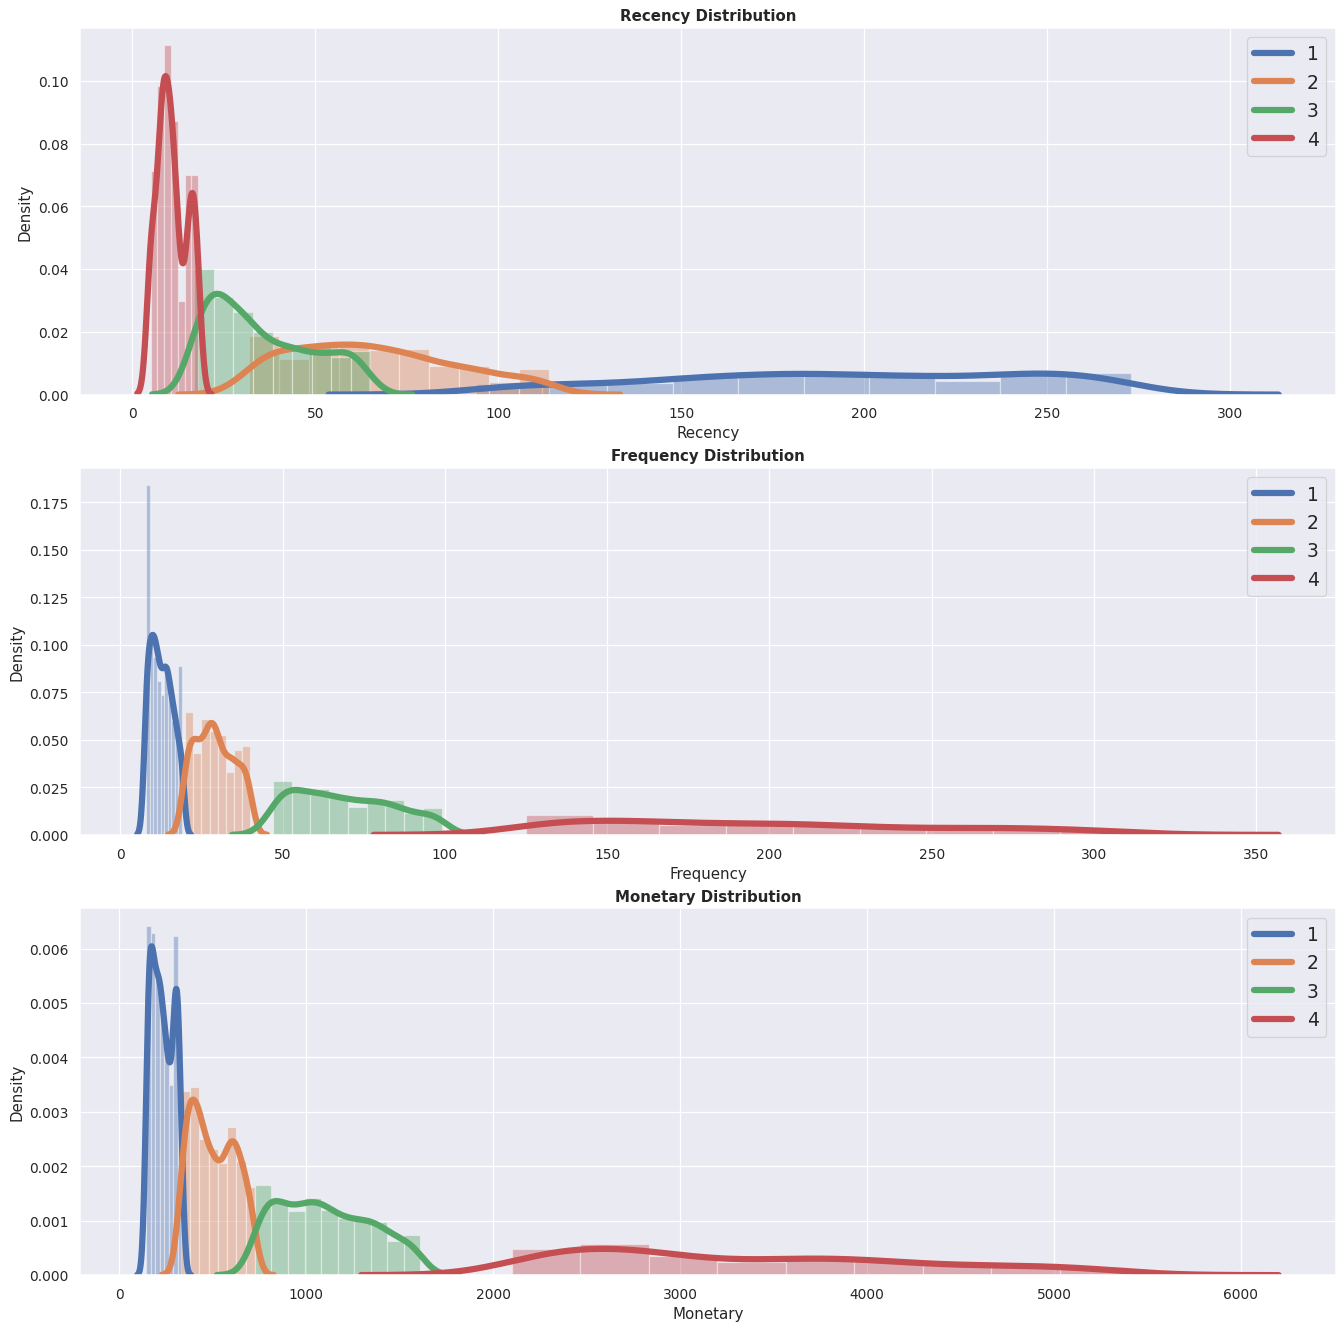



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [45]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
color='Oranges'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## **Quantile Based Clustering**

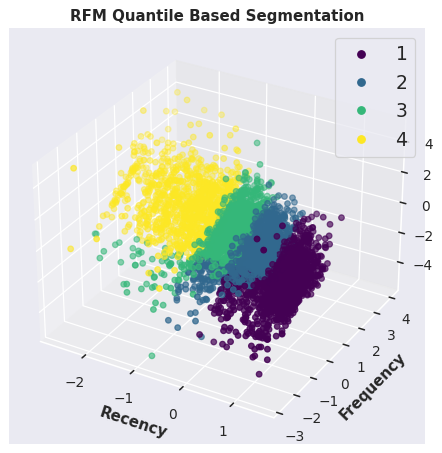

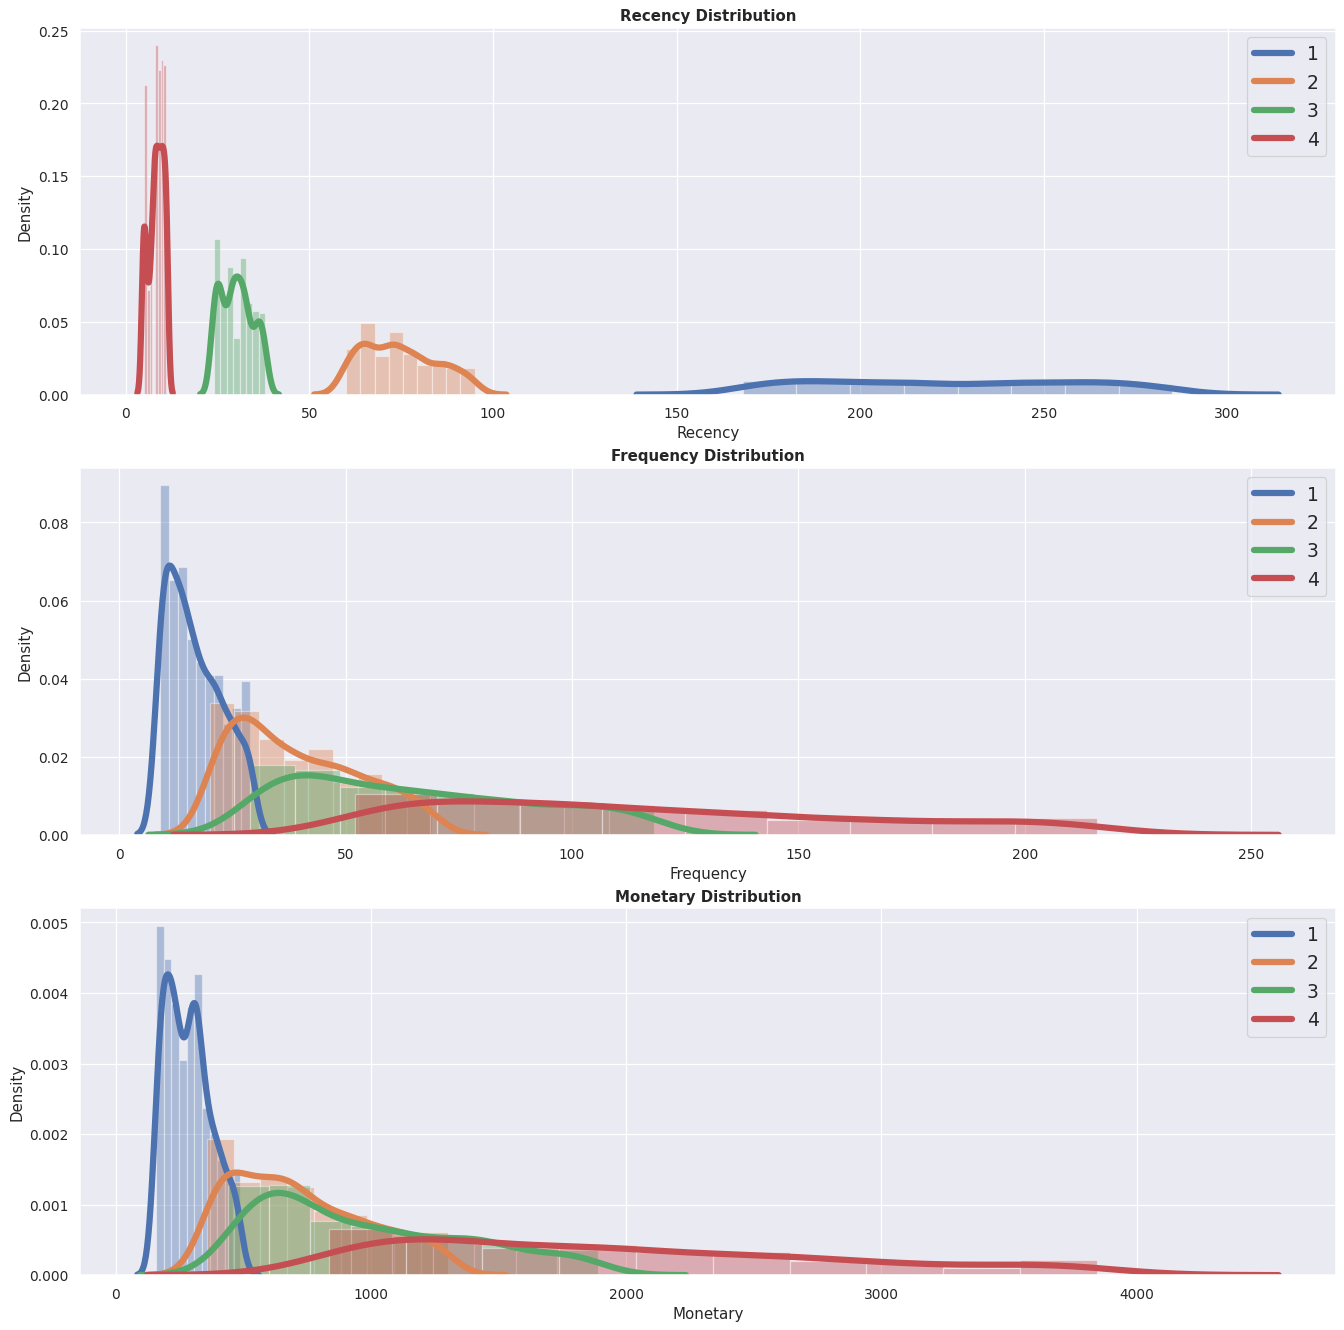



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [46]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
color='BuPu'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## **K-Means Clustering**

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

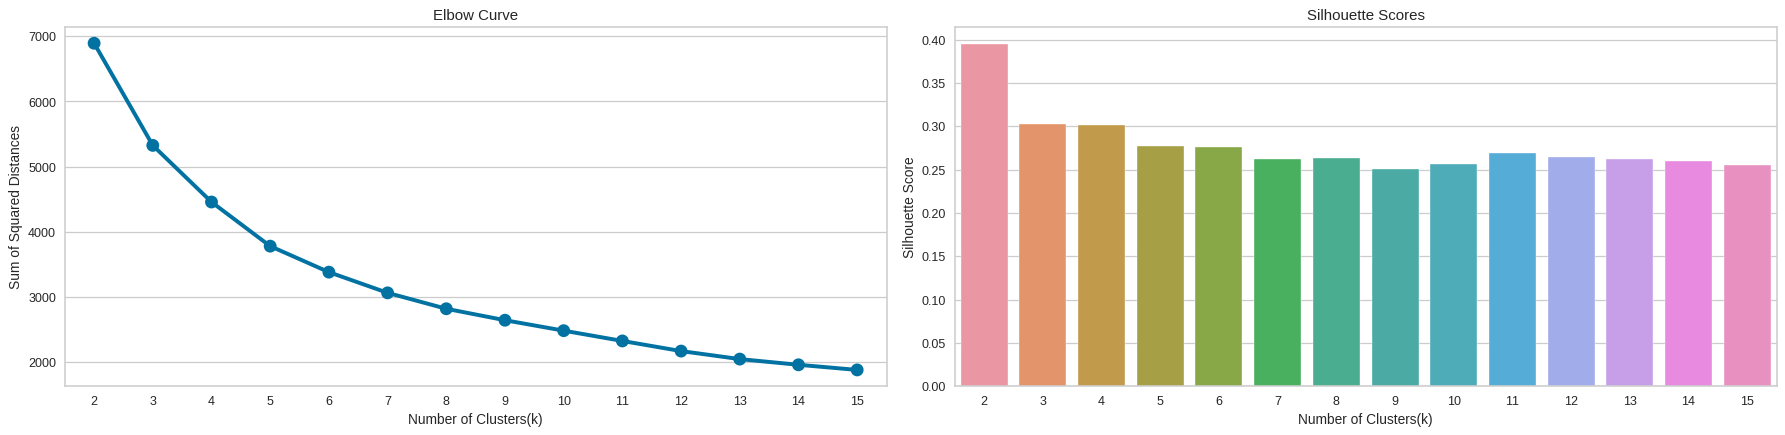

In [48]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

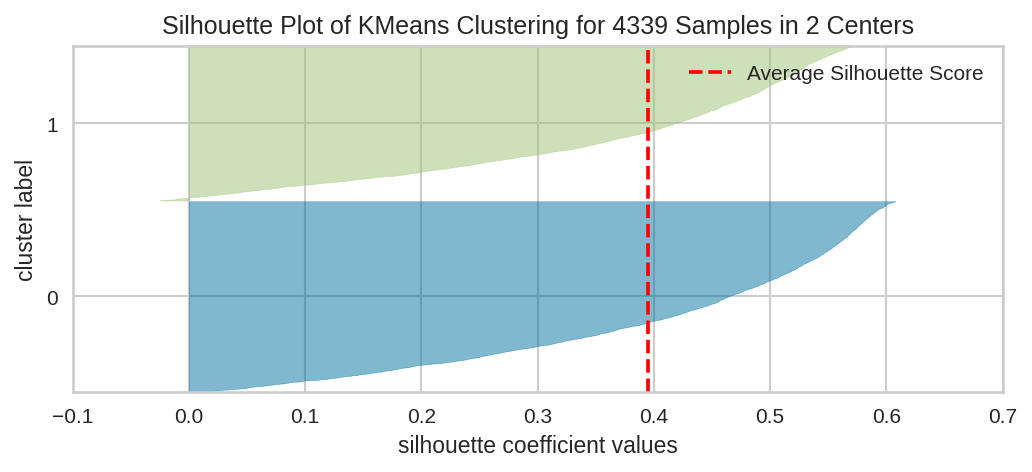

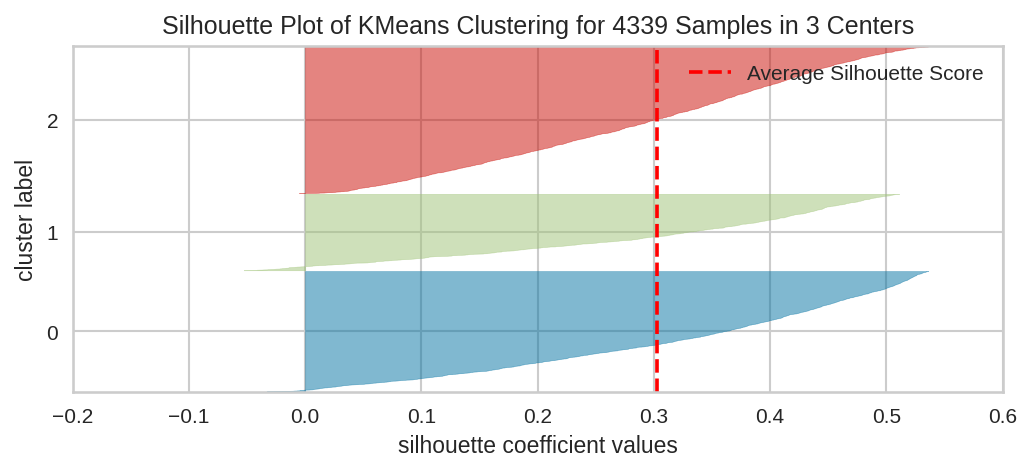

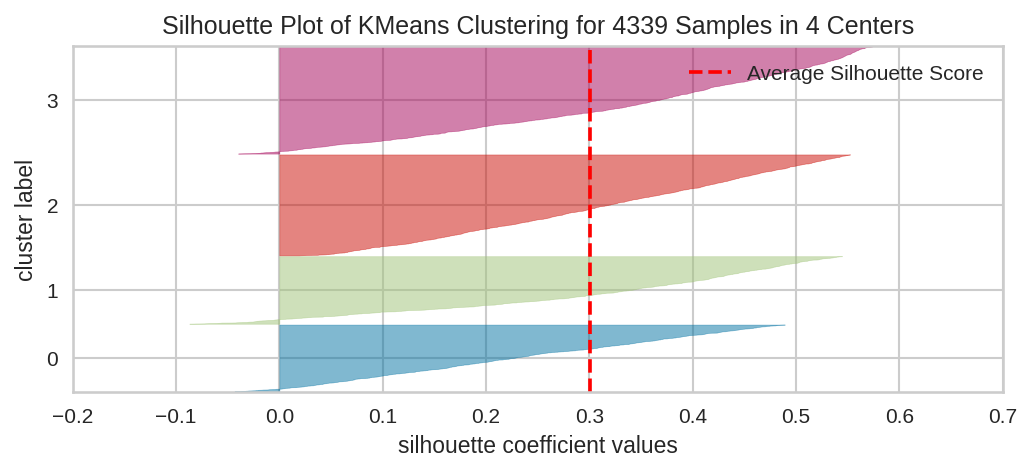

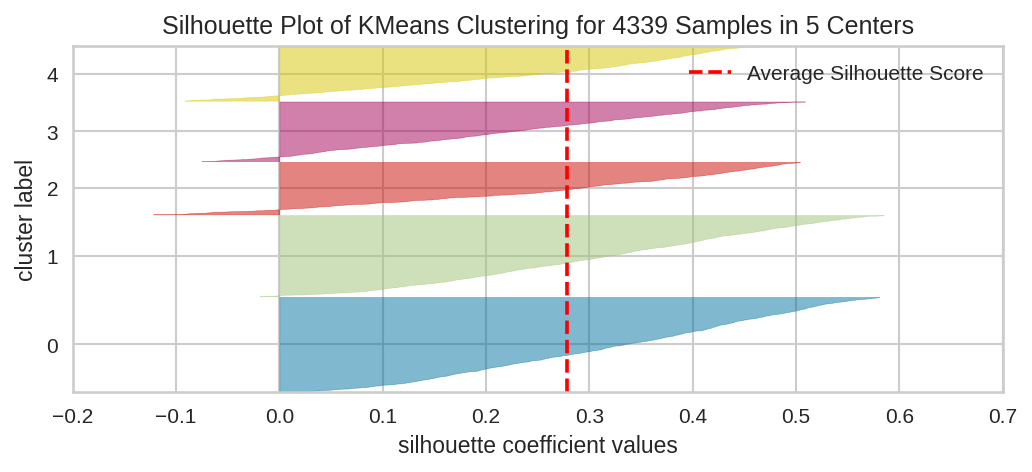

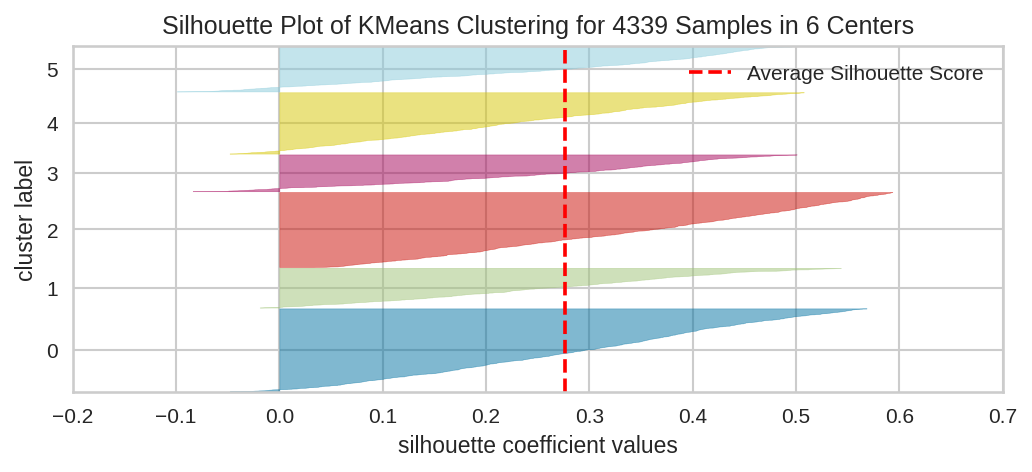

In [49]:

# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

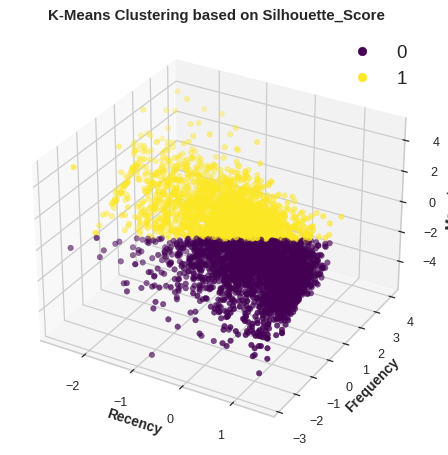

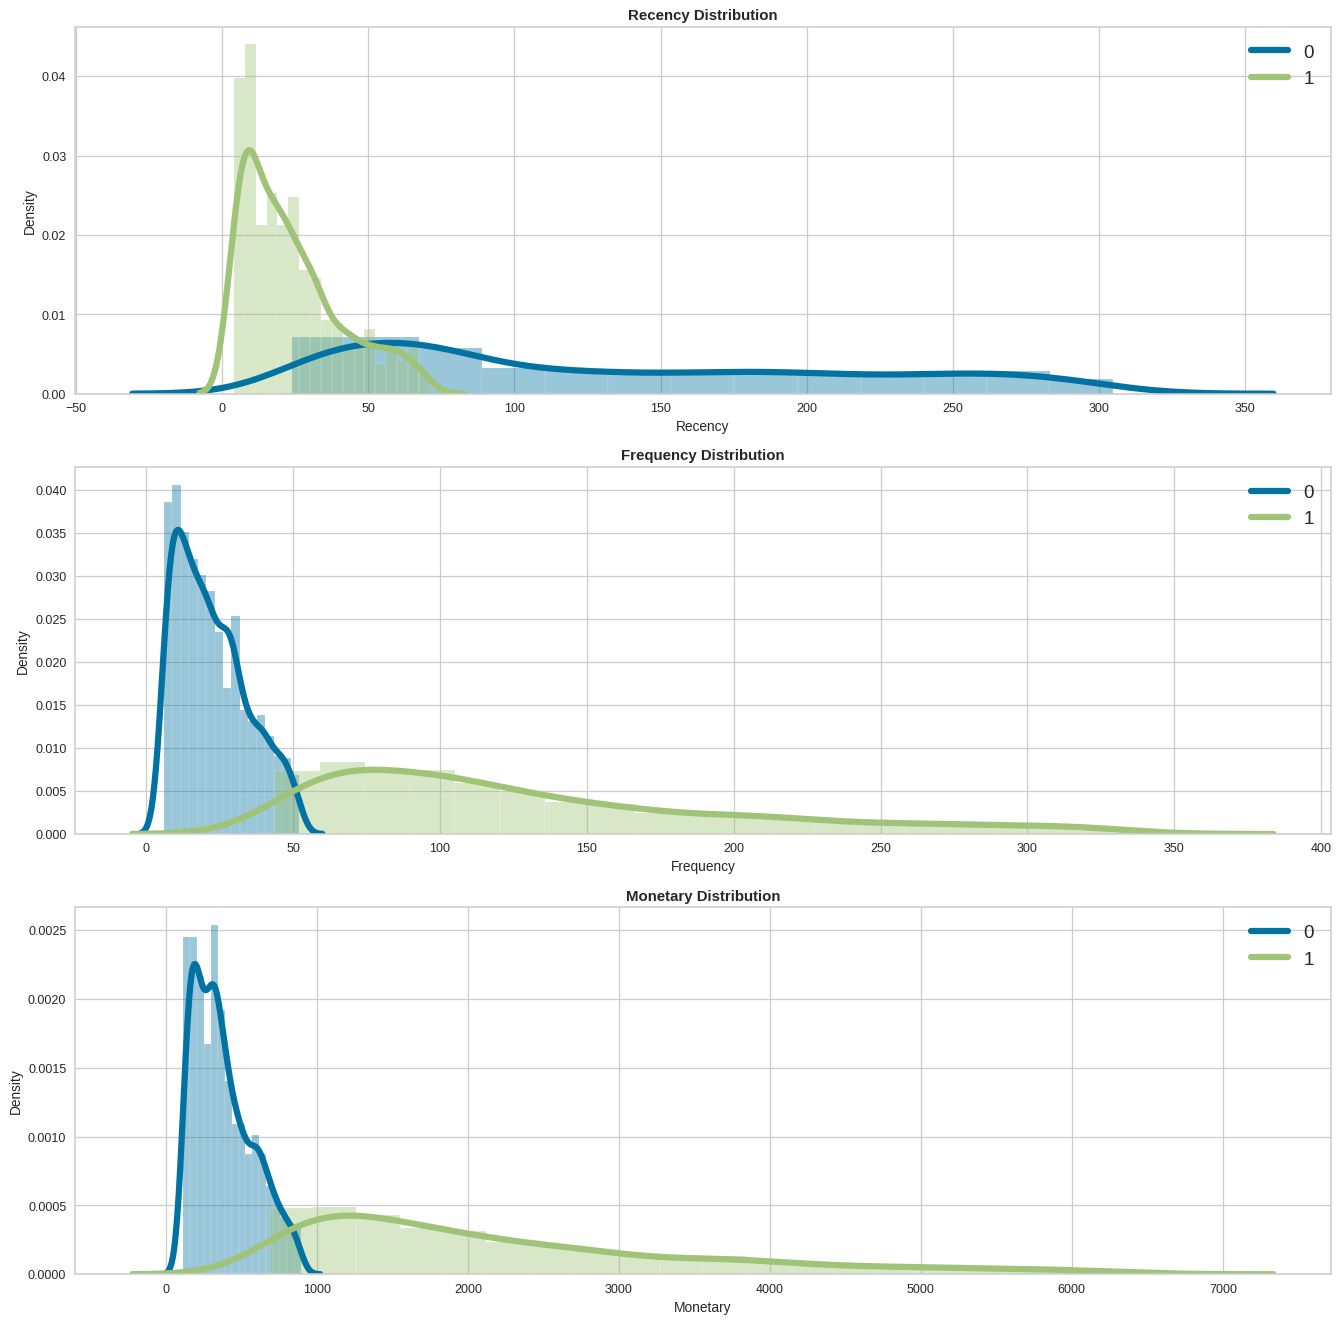



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [50]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
color="inferno"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

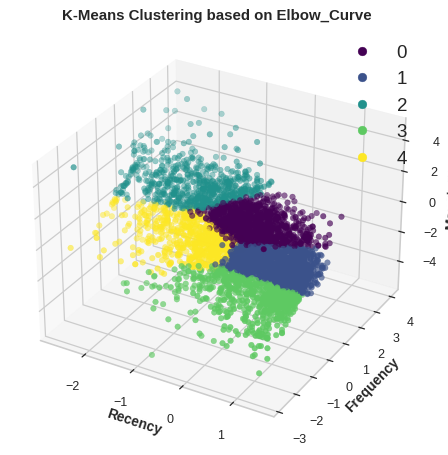

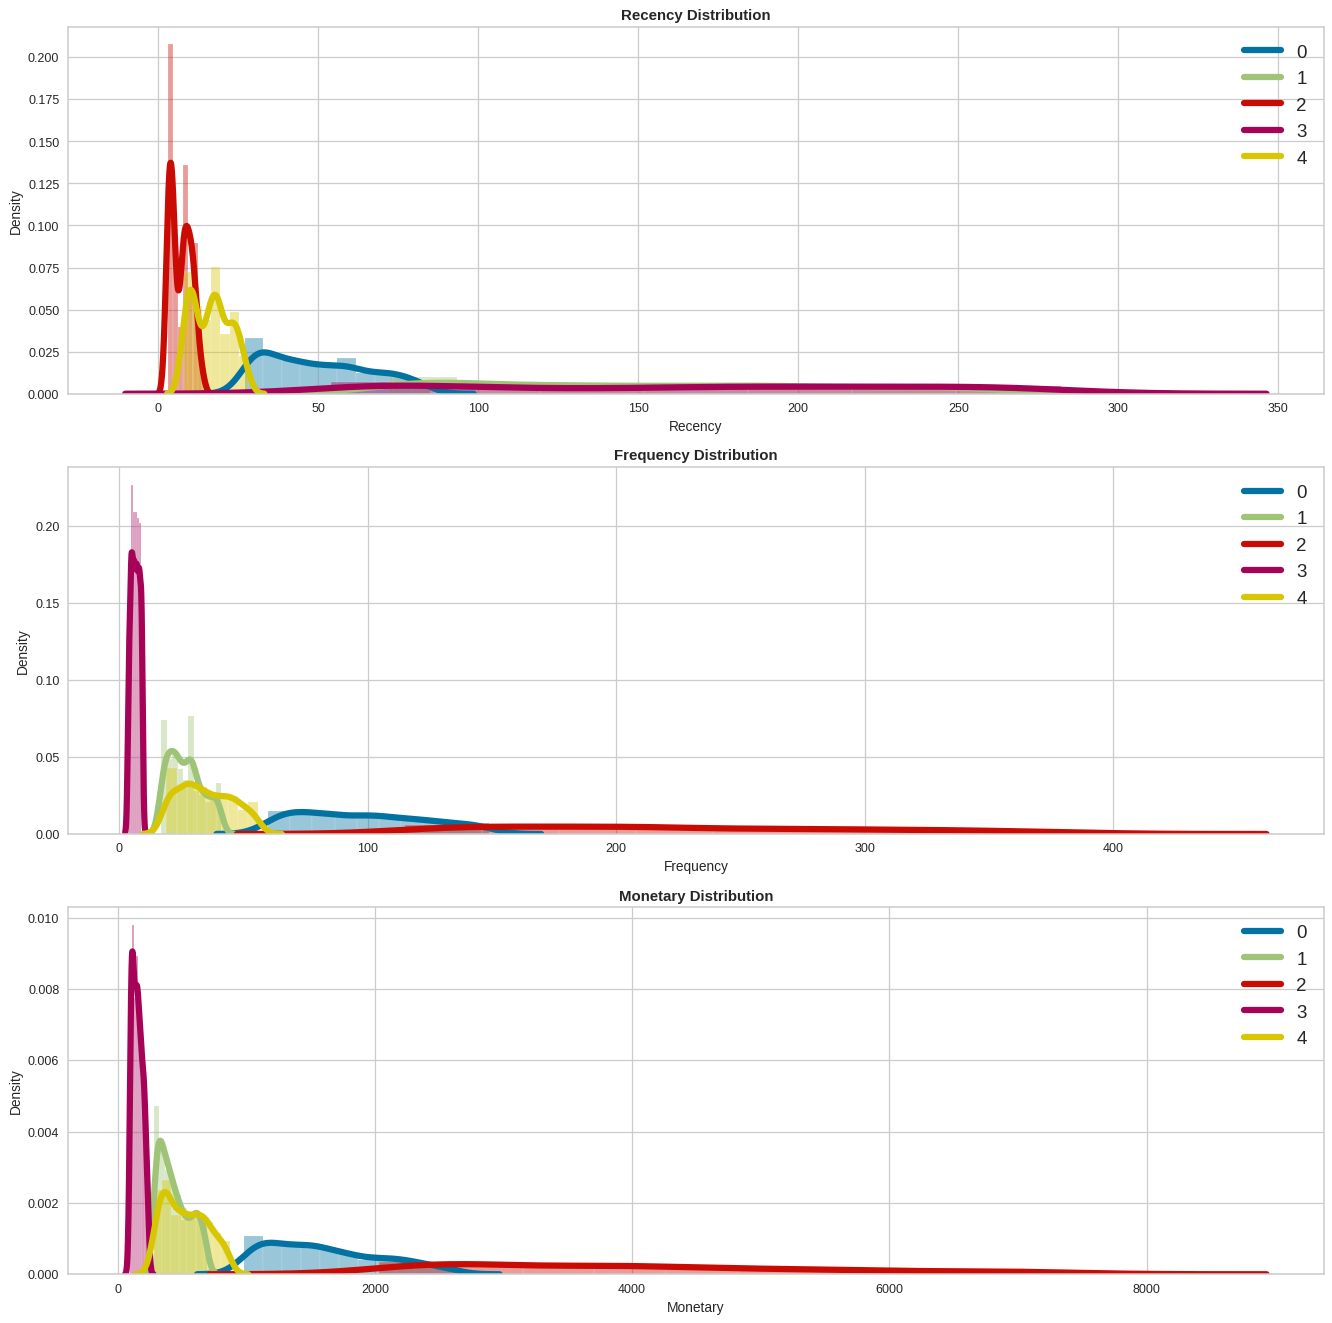



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [51]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
color="tab20"
conclusion[segment_name] = plots_stats_summary(y, segment_name,color, title, overlap_supress)

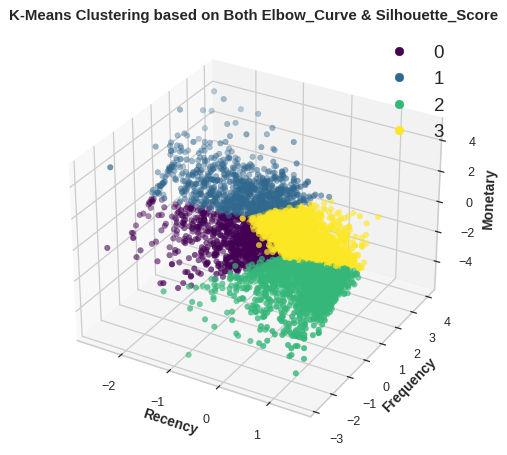

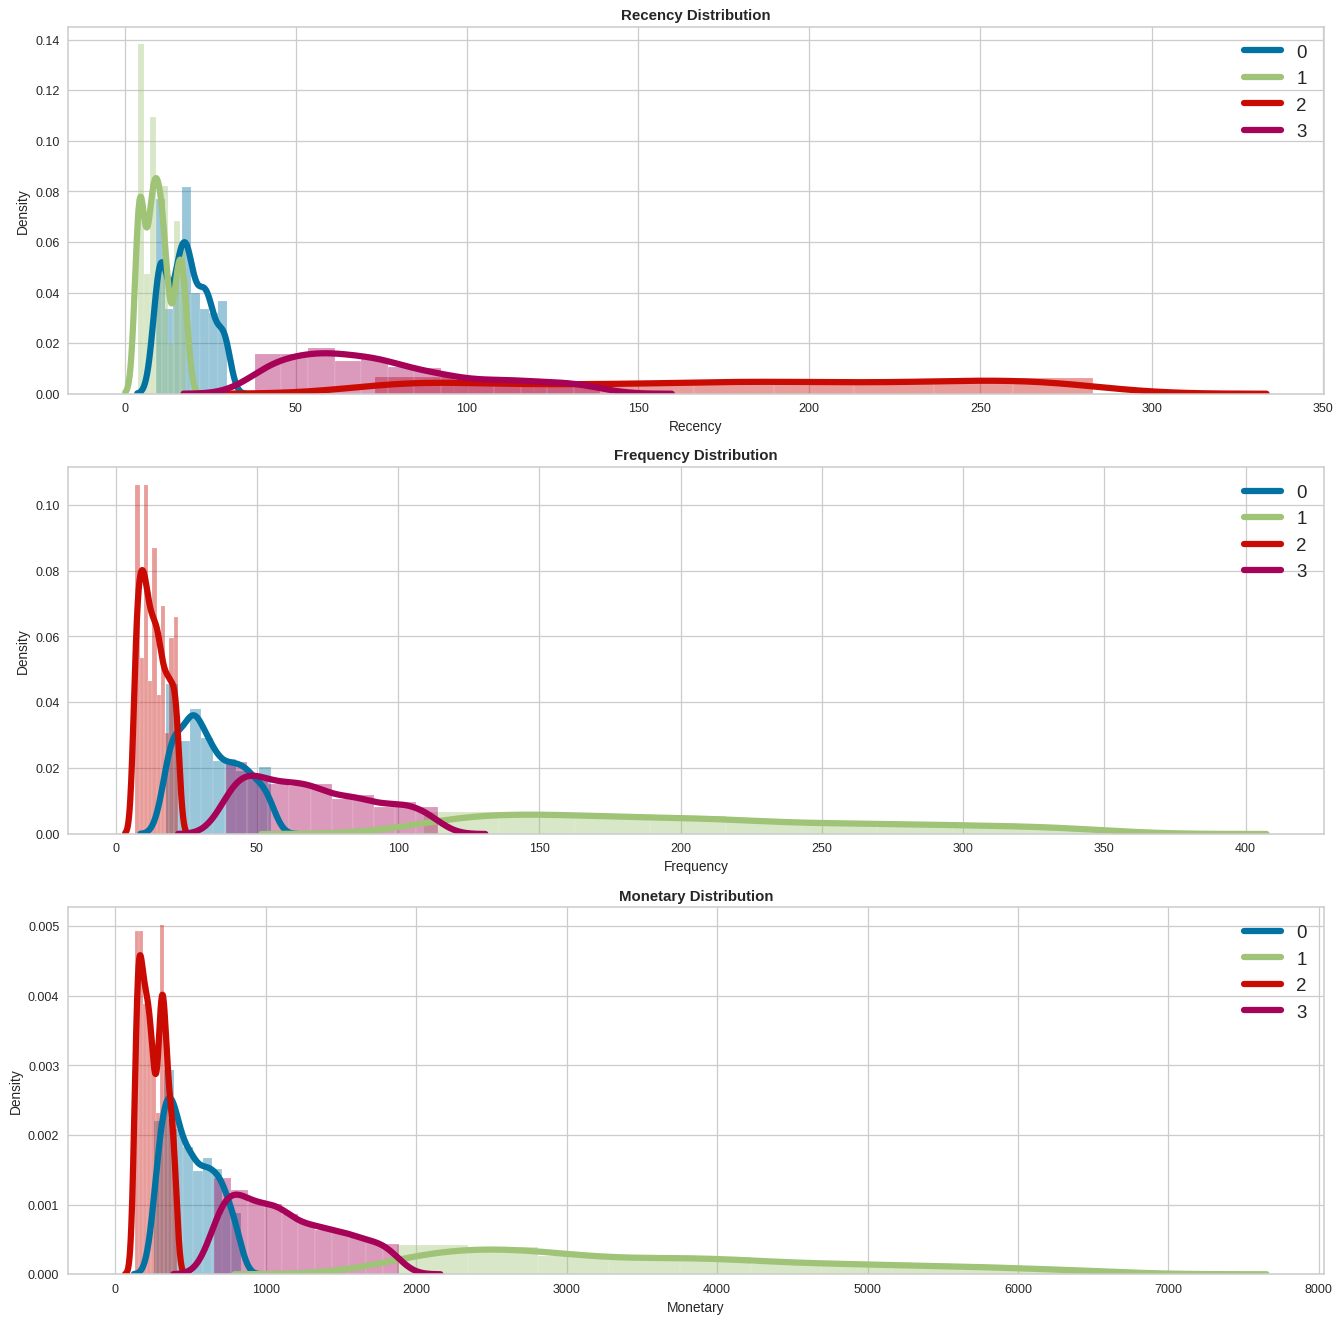



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [52]:

# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.2
color="Pastel1"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## **Hierarchical Clustering**

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

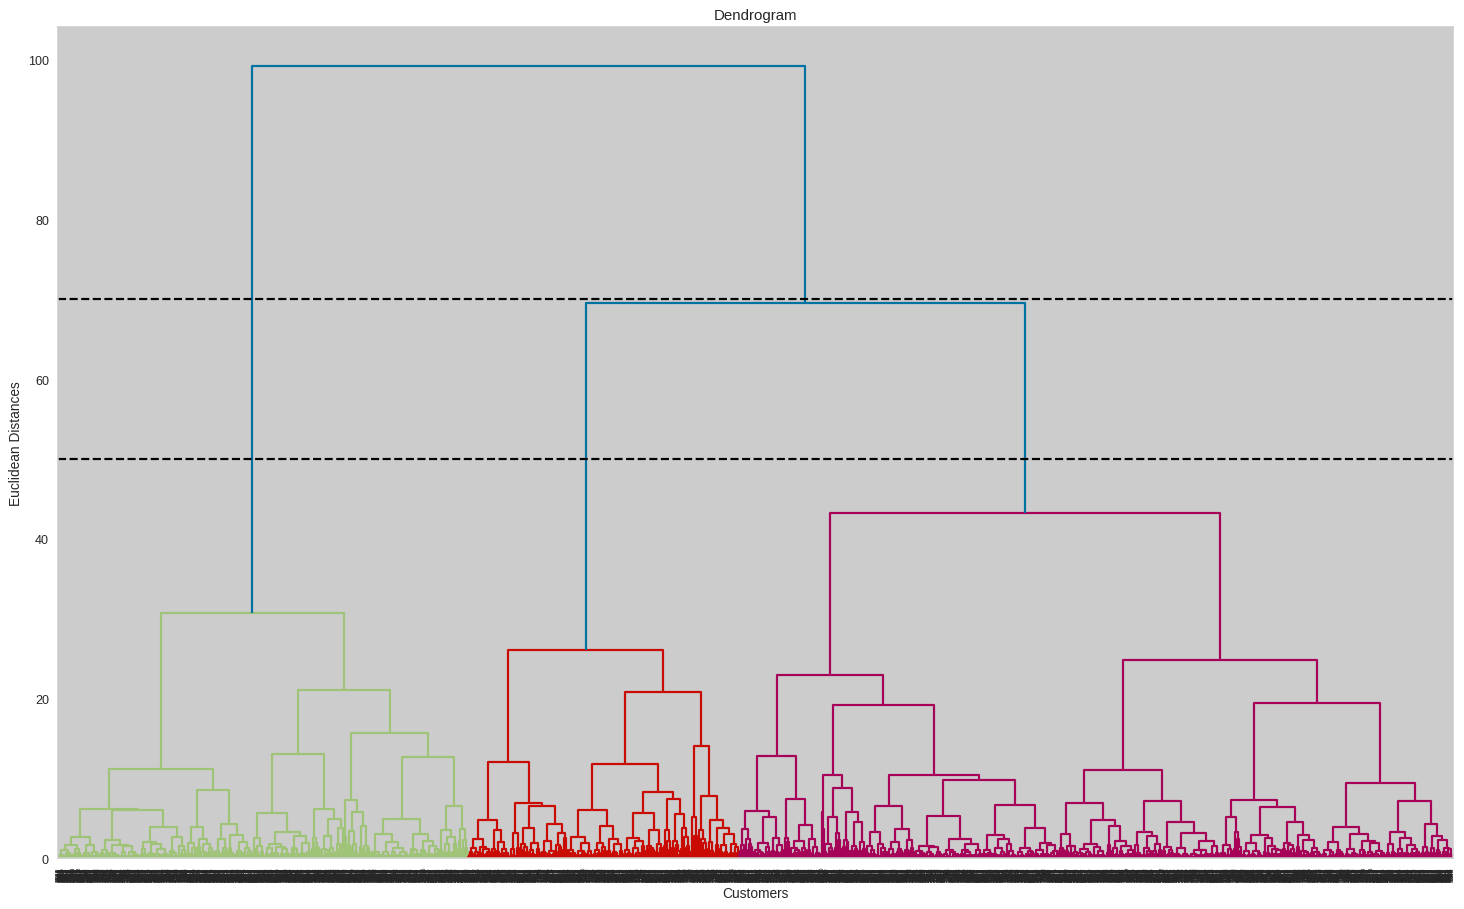

In [54]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

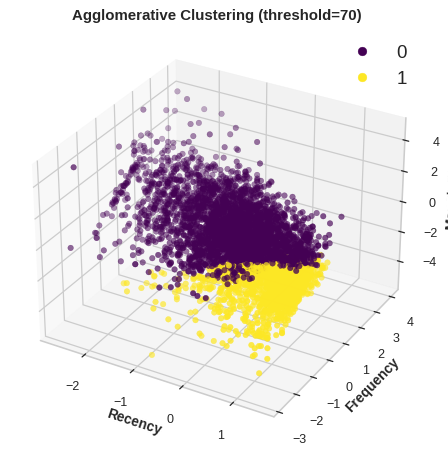

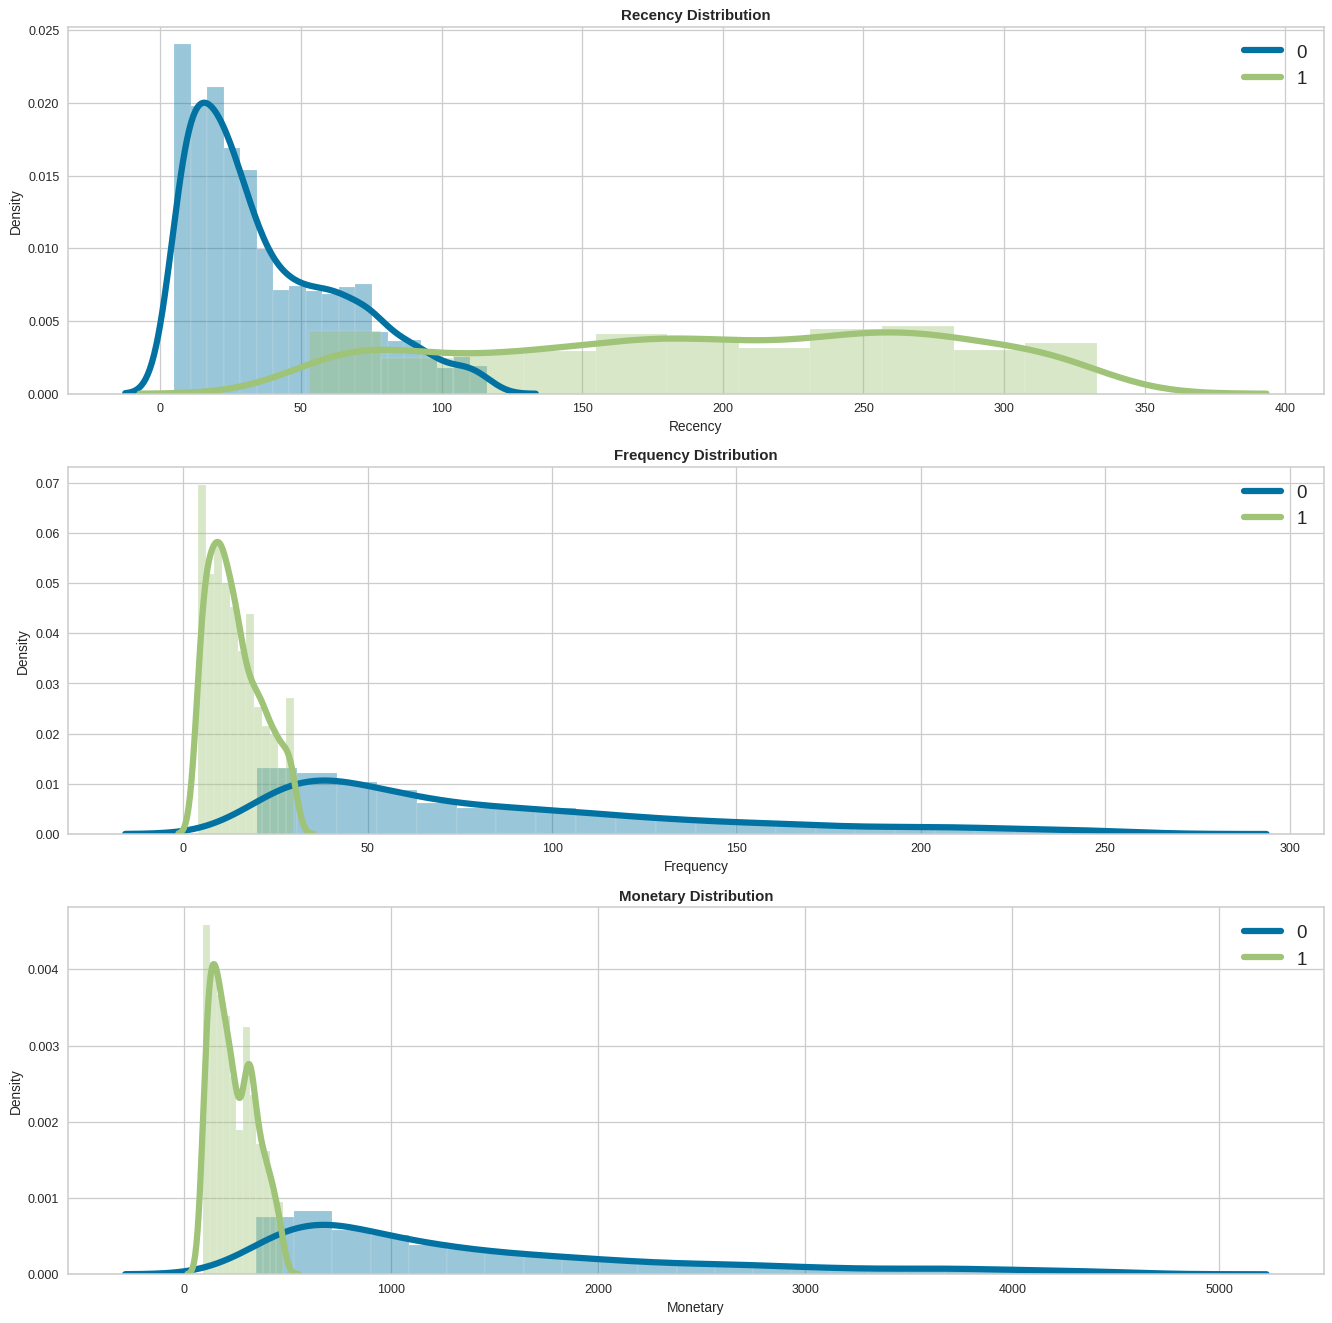



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [55]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
color="gnuplot"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

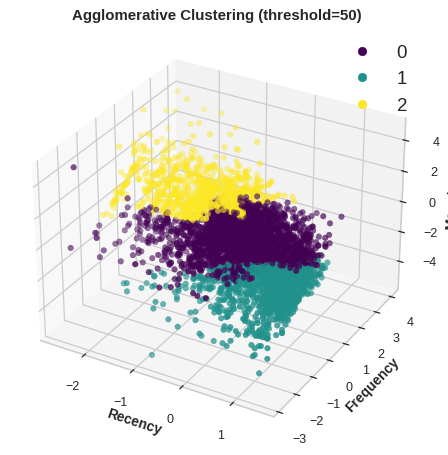

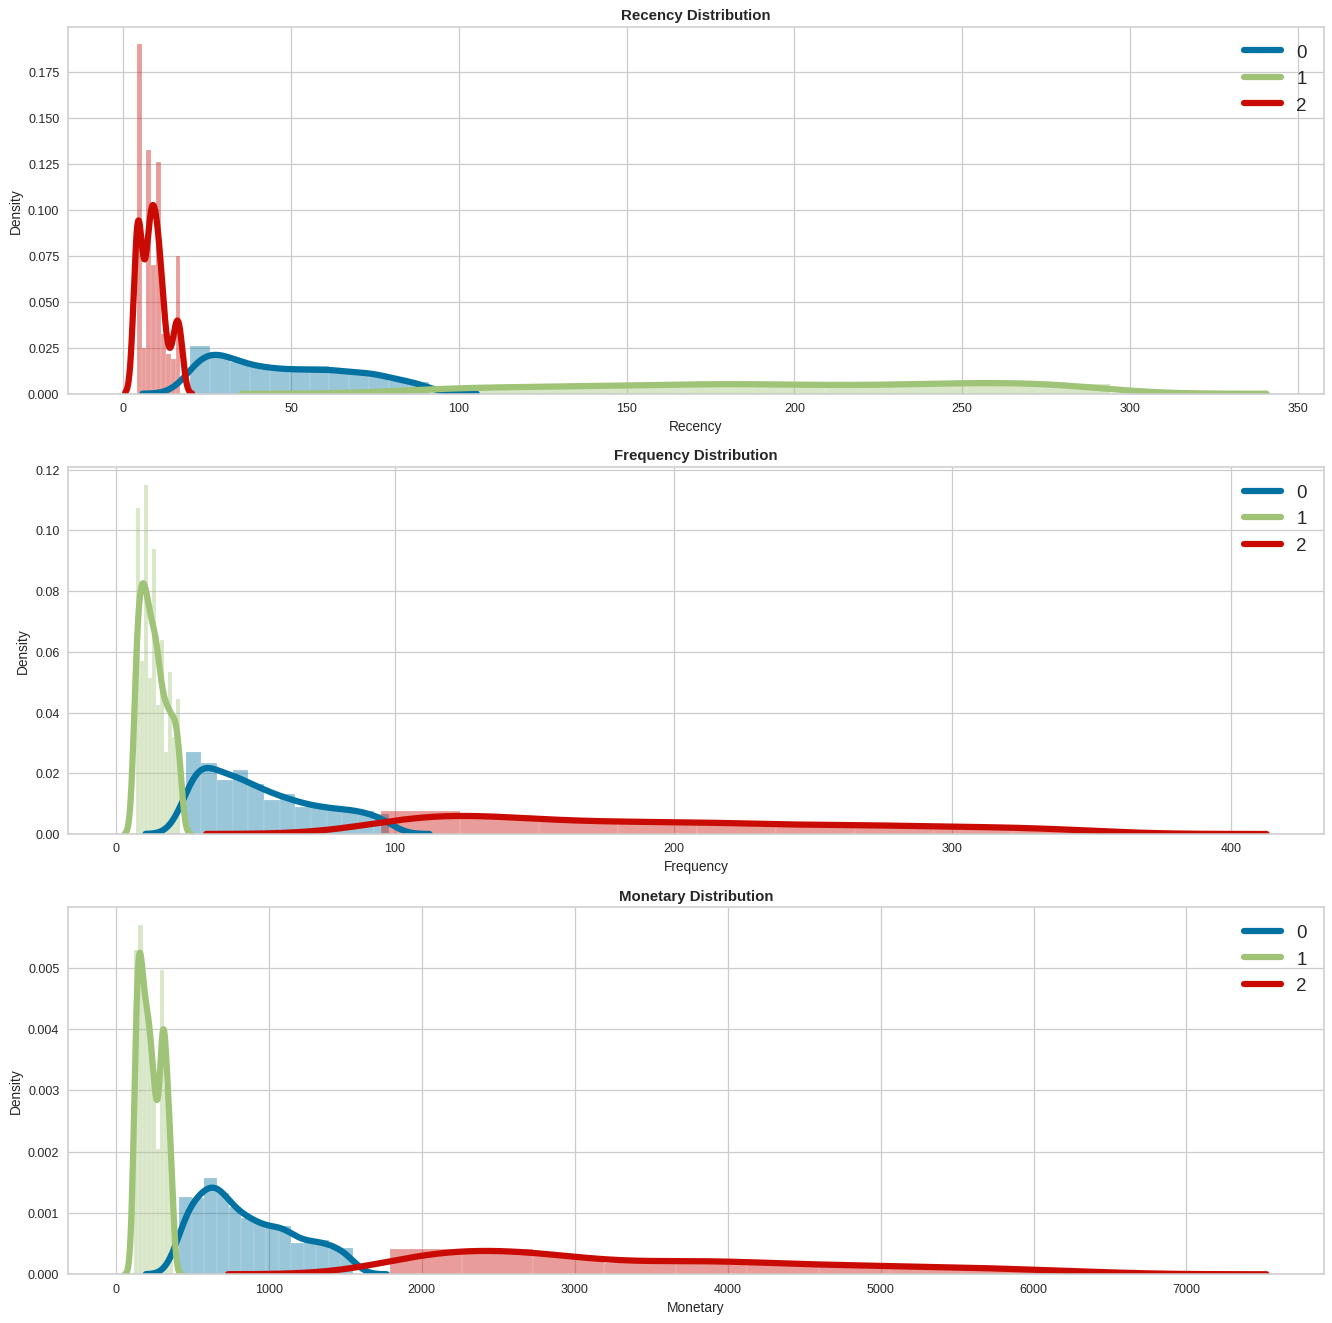



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [56]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.2
color="rainbow"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## **DBScan Clustering**

In [57]:
from sklearn.cluster import DBSCAN

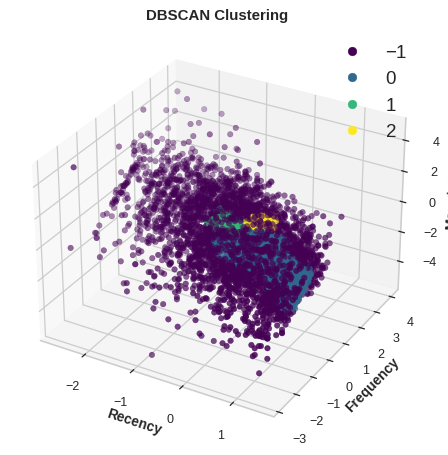

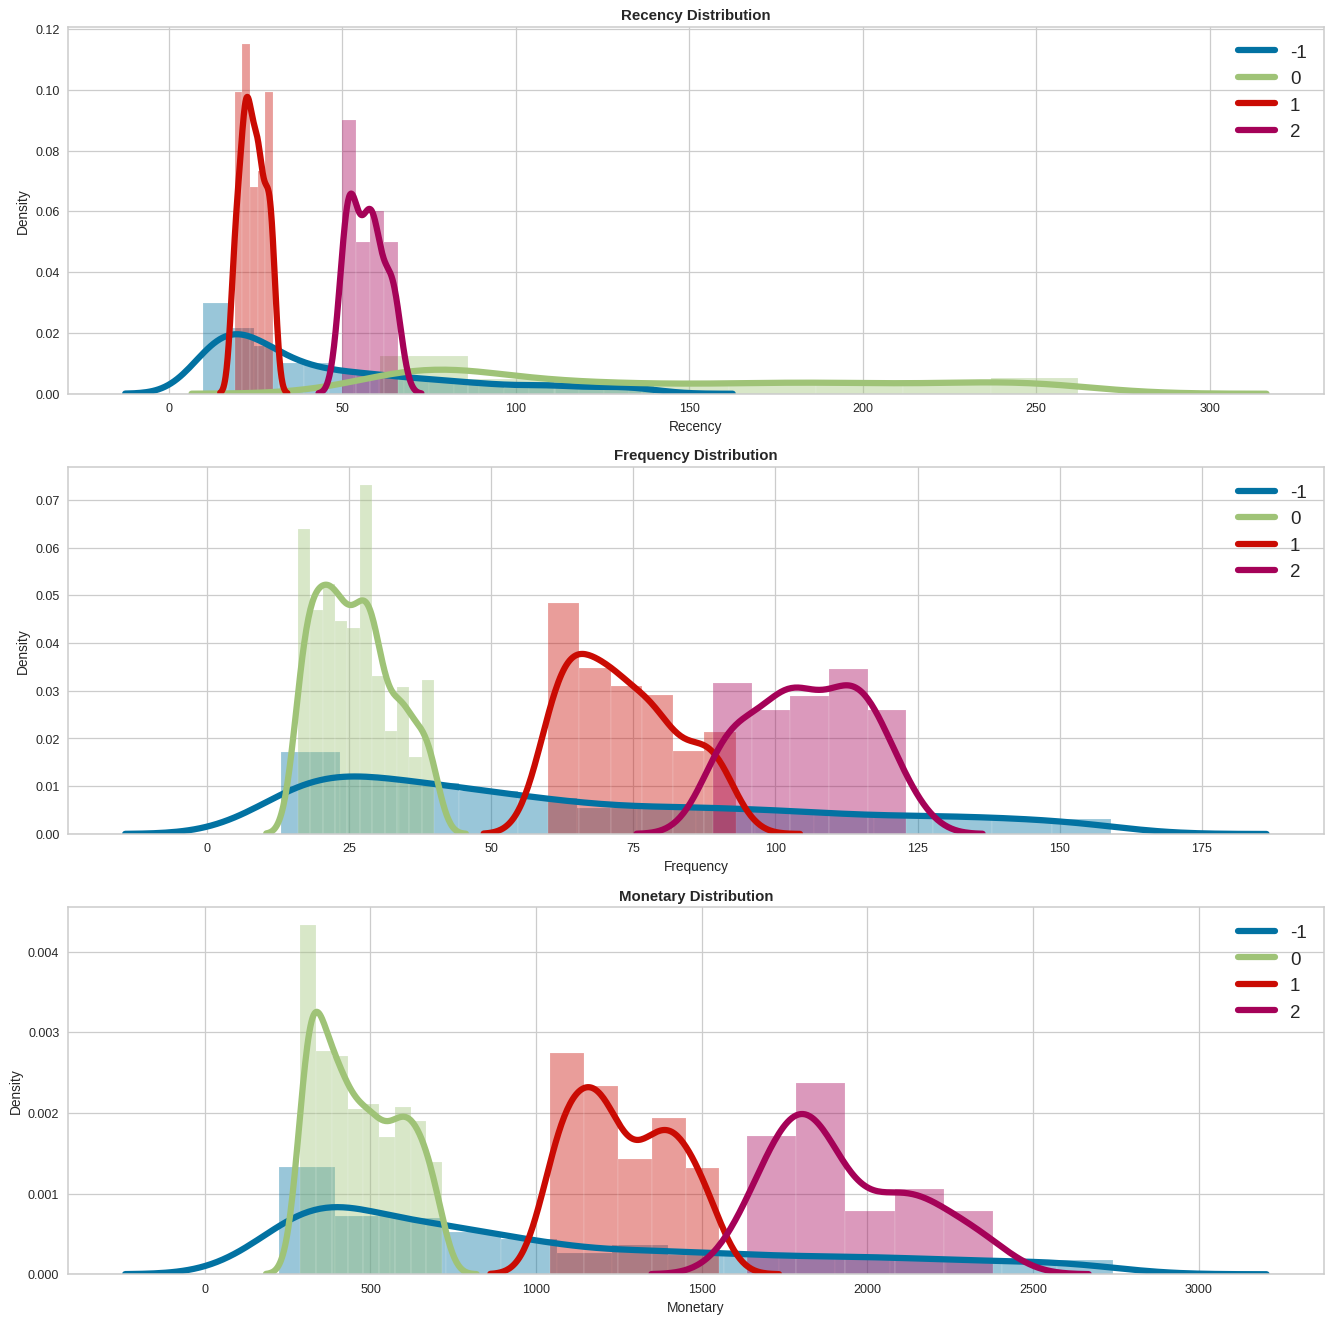



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [58]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
color="YlGnBu"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

In [59]:
# Summarizing the results obtained by clustering using various methods
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Clustering_Technique",'Criterion', "Optimal_Number_of_cluster"])
# Add rows
myTable.add_row(['1',"Binning", "RFM Score Binning", "4"])
myTable.add_row(['2',"Quantile Cut ", "RFM Quantile Cut", "4"])
myTable.add_row(['3',"K-Means ", "Elbow Curve", "5"])
myTable.add_row(['4',"K-Means ", "Silhouette Score", "2"])
myTable.add_row(['5',"K-Means ", "Elbow Curve & Silhouette Score", "4"])
myTable.add_row(['6',"Agglomerative ", "Dendogram (y=70)", "2"])
myTable.add_row(['7',"Agglomerative ", "Dendogram (y=50)", "3"])
myTable.add_row(['8',"DBSCAN ", "eps=0.2, min_samples=25", "4"])

print(myTable)




+--------+----------------------+--------------------------------+---------------------------+
| Sr No. | Clustering_Technique |           Criterion            | Optimal_Number_of_cluster |
+--------+----------------------+--------------------------------+---------------------------+
|   1    |       Binning        |       RFM Score Binning        |             4             |
|   2    |    Quantile Cut      |        RFM Quantile Cut        |             4             |
|   3    |       K-Means        |          Elbow Curve           |             5             |
|   4    |       K-Means        |        Silhouette Score        |             2             |
|   5    |       K-Means        | Elbow Curve & Silhouette Score |             4             |
|   6    |    Agglomerative     |        Dendogram (y=70)        |             2             |
|   7    |    Agglomerative     |        Dendogram (y=50)        |             3             |
|   8    |       DBSCAN         |    eps=0.2, min_

# **Conclusion**





1.   **In conclusion, this online retail segmentation project focused on developing customer segments for a UK-based online store specializing in unique all occasion gifts. By employing a combination of recency, frequency, and monetary analysis (RFM), we successfully segmented customers into clusters, achieving a high average silhouette score of 0.39 for two clusters.**
2.   **Through the utilization of various clustering algorithms, including K-Means, Hierarchical Clustering, and DBSCAN, we explored different perspectives and obtained valuable insights. By considering the Elbow Curve and Silhouette Score criteria, we determined that the optimal number of clusters for our dataset is four.**
3.  **The project highlighted the importance of starting with a simple binning and quantile-based segmentation model, as it provided a preliminary understanding of the data and guided subsequent analysis. The more complex models allowed for a deeper exploration and exploitation of the data, revealing meaningful clusters based on behavioral attributes such as valuability, loyalty, and profitability.**
4.  **The segmentation results and major segments derived from this project are dependent on the specific goals of the business and the desired level of granularity. By considering different criteria and our understanding of the business, we clustered the major segments accordingly.**
5. **Overall, this project has provided valuable insights into customer segmentation, empowering the online retail store to better understand and cater to the unique needs and preferences of its customers, ultimately enhancing customer satisfaction and driving business growth.**











